In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

#seaborn
import seaborn as sns

#json
import json

In [2]:
os.getcwd()

'/Users/eleonoracocciu/Desktop/Unipi/Data mining_fundamentals/K-means_clustering'

In [3]:
df = pd.read_csv("Numerical_Normalized_Train_HR_Employee_Attrition.csv")

In [4]:
df.head()

,Age,DistanceFromHome,MonthlyIncome,PercentSalaryHike,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,MonthlyHours,Attrition,OverTime,OverallSatisfaction,JobLevel,NumCompaniesWorked,Education
0,0.809524,0.285714,0.286171,0.428571,0.000000,0.333333,0.40,0.4375,0.231122,0.0,0.0,0.333333,0.50,1.000000,0.75
1,0.428571,0.000000,0.147183,0.214286,0.333333,0.500000,0.05,0.5000,0.233476,0.0,1.0,0.333333,1.00,0.111111,0.00
2,0.166667,0.535714,0.144644,1.000000,0.333333,0.666667,0.05,0.3125,0.747017,0.0,1.0,0.666667,0.25,0.111111,0.50
3,0.357143,0.142857,0.068878,0.214286,0.000000,0.166667,0.15,0.4375,0.435214,0.0,0.0,0.333333,0.00,0.222222,0.75
4,0.309524,0.285714,0.204325,0.071429,0.000000,0.333333,0.50,0.1250,0.142192,0.0,0.0,0.666667,0.00,0.111111,0.25


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    883 non-null    float64
 1   DistanceFromHome       883 non-null    float64
 2   MonthlyIncome          883 non-null    float64
 3   PercentSalaryHike      883 non-null    float64
 4   StockOptionLevel       883 non-null    float64
 5   TrainingTimesLastYear  883 non-null    float64
 6   YearsAtCompany         883 non-null    float64
 7   YearsInCurrentRole     883 non-null    float64
 8   MonthlyHours           883 non-null    float64
 9   Attrition              883 non-null    float64
 10  OverTime               883 non-null    float64
 11  OverallSatisfaction    883 non-null    float64
 12  JobLevel               883 non-null    float64
 13  NumCompaniesWorked     883 non-null    float64
 14  Education              883 non-null    float64
dtypes: flo

<h3>Feature Selection</h3>

In [6]:
df_copy = pd.DataFrame()

columns_to_add = ['Age','MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'JobLevel', 'Education']

for element in columns_to_add:
    df_copy[element] = df[element]
    
df_copy

,Age,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,JobLevel,Education
0,0.809524,0.231122,0.286171,0.40,0.4375,0.50,0.75
1,0.428571,0.233476,0.147183,0.05,0.5000,1.00,0.00
2,0.166667,0.747017,0.144644,0.05,0.3125,0.25,0.50
3,0.357143,0.435214,0.068878,0.15,0.4375,0.00,0.75
4,0.309524,0.142192,0.204325,0.50,0.1250,0.00,0.25
...,...,...,...,...,...,...,...
878,0.476190,0.453907,0.166769,0.50,0.0000,0.00,0.50
879,0.452381,0.088947,0.042558,0.85,0.0000,0.00,0.25
880,0.357143,0.436931,0.159227,0.55,0.4375,0.25,0.75
881,0.357143,0.323273,0.057373,0.15,0.1250,0.25,0.00


In [7]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   MonthlyHours        883 non-null    float64
 2   MonthlyIncome       883 non-null    float64
 3   YearsAtCompany      883 non-null    float64
 4   YearsInCurrentRole  883 non-null    float64
 5   JobLevel            883 non-null    float64
 6   Education           883 non-null    float64
dtypes: float64(7)
memory usage: 48.4 KB


In [8]:
df_copy.describe()

,Age,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,JobLevel,Education
count,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000,883.000000
mean,0.441784,0.368545,0.227927,0.316308,0.244975,0.229898,0.471687
std,0.196813,0.230461,0.209842,0.226178,0.214712,0.251877,0.252071
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.285714,0.185135,0.079383,0.150000,0.125000,0.000000,0.250000
50%,0.404762,0.329663,0.156611,0.250000,0.187500,0.250000,0.500000
75%,0.571429,0.502469,0.301351,0.450000,0.437500,0.250000,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Convert the DataFrame to a numpy array:
train_data = df_copy.values

In [10]:
train_data

array([[0.80952381, 0.23112189, 0.28617054, ..., 0.4375    , 0.5       ,
        0.75      ],
       [0.42857143, 0.23347612, 0.14718332, ..., 0.5       , 1.        ,
        0.        ],
       [0.16666667, 0.74701738, 0.14464368, ..., 0.3125    , 0.25      ,
        0.5       ],
       ...,
       [0.35714286, 0.43693136, 0.15922734, ..., 0.4375    , 0.25      ,
        0.75      ],
       [0.35714286, 0.32327327, 0.05737263, ..., 0.125     , 0.25      ,
        0.        ],
       [0.64285714, 0.32514957, 0.12990611, ..., 0.25      , 0.25      ,
        0.75      ]])

In [11]:
type(train_data)

numpy.ndarray

<h3>K-means (fourth try)</h3>

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  240.09792123360012 silhouette =  0.15012061641612523

k =  4 SSE =  214.48563590367255 silhouette =  0.16408030042440772

k =  5 SSE =  196.35920446651915 silhouette =  0.15118233888018848

k =  6 SSE =  180.5857192297086 silhouette =  0.16372886538923123

k =  7 SSE =  170.3948932522832 silhouette =  0.1553502095015809

k =  8 SSE =  162.3887046342856 silhouette =  0.1612430112049588

k =  9 SSE =  155.6163989880014 silhouette =  0.15626223562117295

k =  10 SSE =  151.0713195194975 silhouette =  0.13506050769071593

k =  11 SSE =  147.00128053564674 silhouette =  0.13257688616327137

k =  12 SSE =  143.45133689284518 silhouette =  0.14265514925668932

k =  13 SSE =  139.78223603638415 silhouette =  0.12985891220929457

k =  14 SSE =  136.83728626240676 silhouette =  0.1333624939690547

k =  15 SSE =  133.27983553712141 silhouette =  0.13687435826849878

k =  16 SSE =  129.19626018779385 silhouette =  0.13

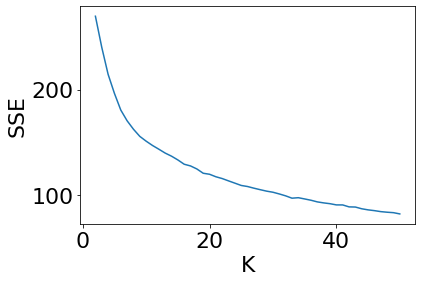

k =  2 SSE =  269.56795131266637 silhouette =  0.16303964806754012

k =  3 SSE =  239.54302662057202 silhouette =  0.142728132339937

k =  4 SSE =  214.56485767658896 silhouette =  0.16394285745888876

k =  5 SSE =  196.91979184935266 silhouette =  0.1522083912245457

k =  6 SSE =  180.60470606396302 silhouette =  0.16431843466319604

k =  7 SSE =  170.40672233179947 silhouette =  0.15493449364977221

k =  8 SSE =  162.4219224440435 silhouette =  0.15796726551148096

k =  9 SSE =  155.56105602428605 silhouette =  0.15601165307451886

k =  10 SSE =  150.89880497652436 silhouette =  0.1479572582968202

k =  11 SSE =  146.7738646905729 silhouette =  0.13363290803445455

k =  12 SSE =  143.03854511225708 silhouette =  0.13364540533807495

k =  13 SSE =  139.65210600547994 silhouette =  0.12885019943840886

k =  14 SSE =  136.33085089392412 silhouette =  0.13205942722925265

k =  15 SSE =  132.56094038946435 silhouette =  0.1328546220328637

k =  16 SSE =  129.8557426032055 silhouette =  0.

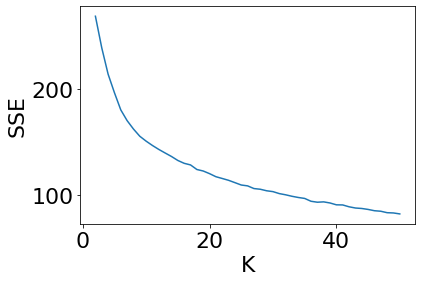

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.58049905551974 silhouette =  0.1438624875724942

k =  4 SSE =  214.48563590367255 silhouette =  0.16408030042440772

k =  5 SSE =  196.35037567252004 silhouette =  0.15202774570941124

k =  6 SSE =  180.644052386779 silhouette =  0.1597377896865604

k =  7 SSE =  170.40293866810975 silhouette =  0.15536007104275698

k =  8 SSE =  162.33320265114986 silhouette =  0.15804447901103247

k =  9 SSE =  155.67417730825053 silhouette =  0.1570425628716871

k =  10 SSE =  151.0029125012672 silhouette =  0.14792712003390013

k =  11 SSE =  146.75350946768899 silhouette =  0.1365924504240919

k =  12 SSE =  144.86975358269558 silhouette =  0.14045631075184928

k =  13 SSE =  139.08934114410357 silhouette =  0.13708860601897918

k =  14 SSE =  136.0356002969594 silhouette =  0.13048867771892558

k =  15 SSE =  132.35690565552713 silhouette =  0.1296558332247122

k =  16 SSE =  129.94526463727712 silhouette =  0.136

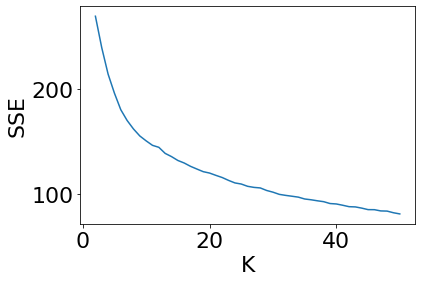

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.58076683458 silhouette =  0.14361601591360032

k =  4 SSE =  214.53515370433388 silhouette =  0.16388098341056276

k =  5 SSE =  196.94621986730473 silhouette =  0.15123885309222024

k =  6 SSE =  180.58028264897746 silhouette =  0.16394476036985642

k =  7 SSE =  170.4504622943598 silhouette =  0.15374676390835096

k =  8 SSE =  162.4494945778192 silhouette =  0.16121535146757868

k =  9 SSE =  155.56702492533086 silhouette =  0.15631295872763193

k =  10 SSE =  150.99976802798355 silhouette =  0.15074207747885227

k =  11 SSE =  146.98896450344174 silhouette =  0.15175025324085786

k =  12 SSE =  143.02938902770254 silhouette =  0.13288826150898508

k =  13 SSE =  139.75594859032734 silhouette =  0.1281804722483711

k =  14 SSE =  136.25345435927804 silhouette =  0.13743224608461196

k =  15 SSE =  132.5958489055633 silhouette =  0.13189497847246368

k =  16 SSE =  130.23085777228266 silhouette =  0.1

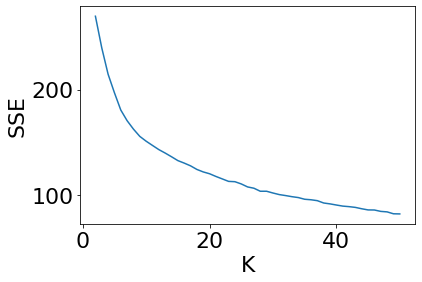

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.46325391739848 silhouette =  0.14453809723036892

k =  4 SSE =  214.50516680224743 silhouette =  0.16378056952703807

k =  5 SSE =  196.35914565198104 silhouette =  0.1514348014288325

k =  6 SSE =  180.59052829528483 silhouette =  0.16359113467132544

k =  7 SSE =  170.52034124773758 silhouette =  0.15471237806969657

k =  8 SSE =  162.32945889077695 silhouette =  0.15873190881689522

k =  9 SSE =  156.74651942821873 silhouette =  0.14037499304059886

k =  10 SSE =  150.9612310313246 silhouette =  0.13860731540327806

k =  11 SSE =  146.8123783250324 silhouette =  0.1303487764159781

k =  12 SSE =  143.39034891326975 silhouette =  0.14479354630320382

k =  13 SSE =  139.34873294349717 silhouette =  0.13628705192119495

k =  14 SSE =  135.5786080134347 silhouette =  0.13229199799470726

k =  15 SSE =  132.02786486194321 silhouette =  0.1394270028400339

k =  16 SSE =  129.75175978216174 silhouette =  0.

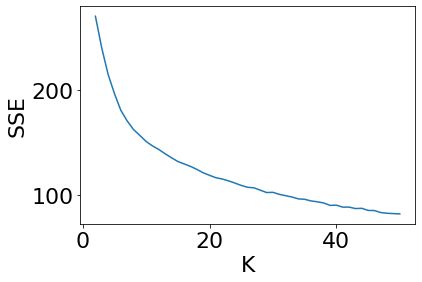

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.42868800937498 silhouette =  0.1468034253427755

k =  4 SSE =  214.6545351190759 silhouette =  0.15559497846349699

k =  5 SSE =  196.3837833301081 silhouette =  0.15541276203370938

k =  6 SSE =  180.5990368542217 silhouette =  0.16439287282356382

k =  7 SSE =  170.36224889152422 silhouette =  0.1562892494005427

k =  8 SSE =  162.67914678372398 silhouette =  0.15925410061834402

k =  9 SSE =  155.7048405460938 silhouette =  0.15494181457855952

k =  10 SSE =  151.05960607733942 silhouette =  0.14980908042615176

k =  11 SSE =  146.93441194804802 silhouette =  0.1268439123969046

k =  12 SSE =  143.76434603288592 silhouette =  0.14273439900717194

k =  13 SSE =  139.10280843675673 silhouette =  0.13431167289471177

k =  14 SSE =  135.81242423651344 silhouette =  0.14189738120905018

k =  15 SSE =  133.44539874908375 silhouette =  0.13010447510615075

k =  16 SSE =  129.4098782041088 silhouette =  0.12

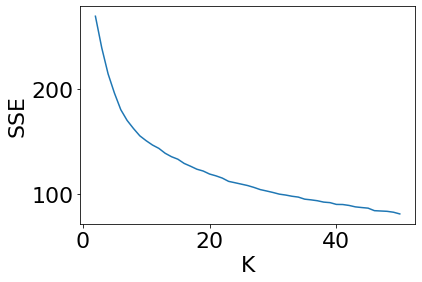

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.49238631323664 silhouette =  0.14317886525194387

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.35137871193186 silhouette =  0.15193897817286842

k =  6 SSE =  180.58821245354542 silhouette =  0.16326787710447138

k =  7 SSE =  170.3859945022477 silhouette =  0.15514017968530391

k =  8 SSE =  162.49980886674706 silhouette =  0.15824111984747963

k =  9 SSE =  155.82454070480588 silhouette =  0.15918335466499745

k =  10 SSE =  151.0683627360298 silhouette =  0.14580963523645504

k =  11 SSE =  147.05500434908294 silhouette =  0.14746197729164953

k =  12 SSE =  143.5057728594342 silhouette =  0.13255198418134906

k =  13 SSE =  139.71189432159417 silhouette =  0.12783327522169105

k =  14 SSE =  135.88186143060497 silhouette =  0.1362352500624159

k =  15 SSE =  133.21545474742405 silhouette =  0.13518416154262716

k =  16 SSE =  128.4479038529669 silhouette =  0

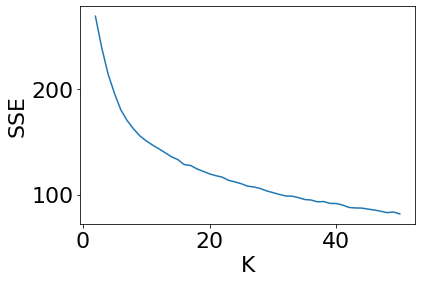

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.41966324247394 silhouette =  0.14746458513950791

k =  4 SSE =  214.499057367396 silhouette =  0.16361139982097217

k =  5 SSE =  196.35911984438525 silhouette =  0.15125989843019008

k =  6 SSE =  180.58580697567064 silhouette =  0.16341235172259078

k =  7 SSE =  170.43396728487812 silhouette =  0.15603926993345504

k =  8 SSE =  162.30486908608268 silhouette =  0.15870242435192305

k =  9 SSE =  155.60111405158625 silhouette =  0.15558251375246596

k =  10 SSE =  151.01439088349542 silhouette =  0.13740687152627376

k =  11 SSE =  146.49437935049085 silhouette =  0.13377039554143602

k =  12 SSE =  143.2170623483676 silhouette =  0.12287077437376688

k =  13 SSE =  140.62281807290265 silhouette =  0.1318913119716817

k =  14 SSE =  136.16310868139212 silhouette =  0.12914158184787133

k =  15 SSE =  133.4058646014515 silhouette =  0.12795003951778613

k =  16 SSE =  129.2294108024259 silhouette =  0.

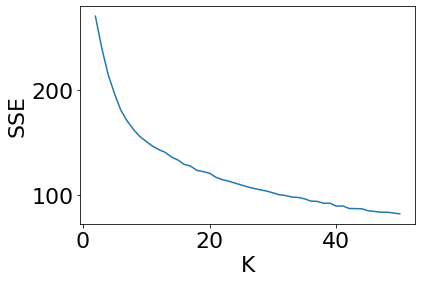

k =  2 SSE =  269.56075331488233 silhouette =  0.16186819272276579

k =  3 SSE =  239.40614400602922 silhouette =  0.1480510713933051

k =  4 SSE =  214.5011235306252 silhouette =  0.1638395256426279

k =  5 SSE =  197.0647114551409 silhouette =  0.166640865128155

k =  6 SSE =  180.5832353883301 silhouette =  0.16322452446476854

k =  7 SSE =  170.44419969193214 silhouette =  0.15623515909803432

k =  8 SSE =  162.34730836820688 silhouette =  0.15837103592353213

k =  9 SSE =  155.68137944820805 silhouette =  0.1565046898112417

k =  10 SSE =  151.1441050175749 silhouette =  0.14276603497504997

k =  11 SSE =  146.64578507573498 silhouette =  0.15199782668989528

k =  12 SSE =  142.34396316889243 silhouette =  0.13433745616093937

k =  13 SSE =  139.71055562804557 silhouette =  0.13214976933490263

k =  14 SSE =  136.54570871935618 silhouette =  0.13246028883386127

k =  15 SSE =  132.57548393546844 silhouette =  0.13943798637220373

k =  16 SSE =  129.87643961816187 silhouette =  0.1

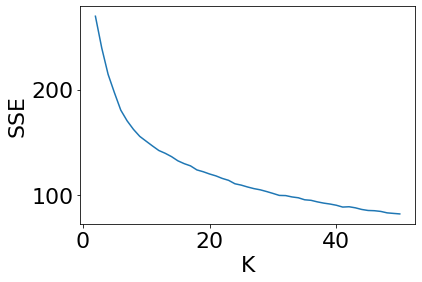

k =  2 SSE =  269.56111155841074 silhouette =  0.16186819272276579

k =  3 SSE =  239.58049905551974 silhouette =  0.1438624875724942

k =  4 SSE =  214.53515370433388 silhouette =  0.16388098341056276

k =  5 SSE =  196.41031601043176 silhouette =  0.15771083544495768

k =  6 SSE =  180.58700146757906 silhouette =  0.1643017085713083

k =  7 SSE =  170.50931079382852 silhouette =  0.15825826734135184

k =  8 SSE =  162.421090365701 silhouette =  0.1568906350115646

k =  9 SSE =  155.8172088926028 silhouette =  0.15128775347515

k =  10 SSE =  151.12097155056648 silhouette =  0.1392954133857574

k =  11 SSE =  146.8215029994363 silhouette =  0.14028619565567615

k =  12 SSE =  142.53011455159 silhouette =  0.13544239427187418

k =  13 SSE =  139.96655745530055 silhouette =  0.1378615306042483

k =  14 SSE =  137.29818653089347 silhouette =  0.12876542129761123

k =  15 SSE =  133.50837068140038 silhouette =  0.13399333037513922

k =  16 SSE =  129.68163776506887 silhouette =  0.1344567

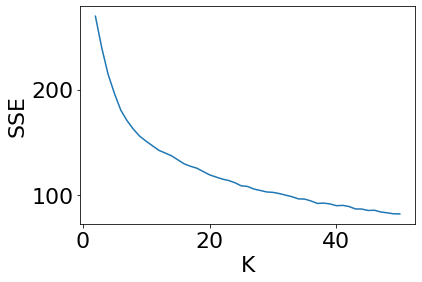

k =  2 SSE =  269.55969164943014 silhouette =  0.16186819272276579

k =  3 SSE =  239.41988549547804 silhouette =  0.14807845290191188

k =  4 SSE =  214.50865584706995 silhouette =  0.16288165649822925

k =  5 SSE =  196.38309312327726 silhouette =  0.1537756825407358

k =  6 SSE =  180.5804880663535 silhouette =  0.16349845348741296

k =  7 SSE =  170.41453458301893 silhouette =  0.15707478585158874

k =  8 SSE =  162.57577880939706 silhouette =  0.15556149649939113

k =  9 SSE =  156.85814920200605 silhouette =  0.13878629852059024

k =  10 SSE =  150.91757818440712 silhouette =  0.14866821884673034

k =  11 SSE =  146.62379847666972 silhouette =  0.14507361809380664

k =  12 SSE =  143.76481354316851 silhouette =  0.13225778851082973

k =  13 SSE =  139.31126254240402 silhouette =  0.1362636894637721

k =  14 SSE =  135.5178097391694 silhouette =  0.13341300361740915

k =  15 SSE =  133.35511915556486 silhouette =  0.126324171858649

k =  16 SSE =  129.52263858619992 silhouette =  

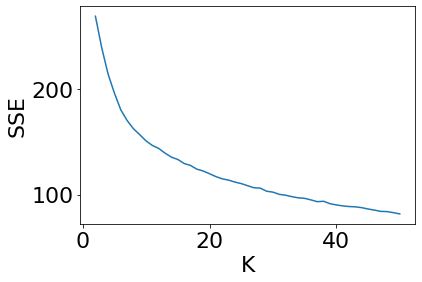

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  240.65398269893166 silhouette =  0.13537679418138063

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.41716739361442 silhouette =  0.1578675099005383

k =  6 SSE =  180.5782273571272 silhouette =  0.1645195712992588

k =  7 SSE =  170.42443411322867 silhouette =  0.15530148923881618

k =  8 SSE =  162.3285545845563 silhouette =  0.15943758992302356

k =  9 SSE =  155.54811425031627 silhouette =  0.15869330690532807

k =  10 SSE =  151.1508857514557 silhouette =  0.15412287956069917

k =  11 SSE =  146.7800900104929 silhouette =  0.13529856137714824

k =  12 SSE =  143.88136266309044 silhouette =  0.13350621152044354

k =  13 SSE =  139.79627319677488 silhouette =  0.13292147247640762

k =  14 SSE =  136.6367912120137 silhouette =  0.13089435616261996

k =  15 SSE =  133.5099710949296 silhouette =  0.1276451643510068

k =  16 SSE =  129.2515928936291 silhouette =  0.1395

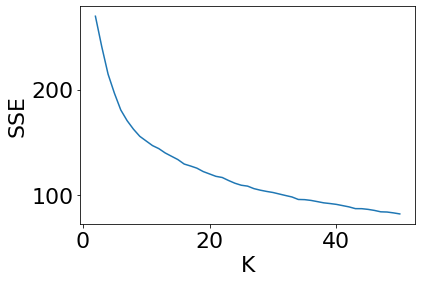

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.49906372899244 silhouette =  0.14252935818370377

k =  4 SSE =  214.51072201029916 silhouette =  0.16310897437616095

k =  5 SSE =  196.36265654607675 silhouette =  0.15131712095594554

k =  6 SSE =  180.58541164105225 silhouette =  0.1634942618935871

k =  7 SSE =  170.41551226896934 silhouette =  0.1577092894876214

k =  8 SSE =  162.62412469523943 silhouette =  0.1579583816079218

k =  9 SSE =  157.0735509261656 silhouette =  0.15568785428732454

k =  10 SSE =  151.2864127497147 silhouette =  0.1468531534371838

k =  11 SSE =  147.99801273142717 silhouette =  0.1536338463041955

k =  12 SSE =  142.27208717569138 silhouette =  0.13767760994382924

k =  13 SSE =  139.1743346918901 silhouette =  0.13330525666515197

k =  14 SSE =  136.77817792776747 silhouette =  0.13532251879005508

k =  15 SSE =  132.519668678719 silhouette =  0.130710845325249

k =  16 SSE =  130.5159588112213 silhouette =  0.1309745

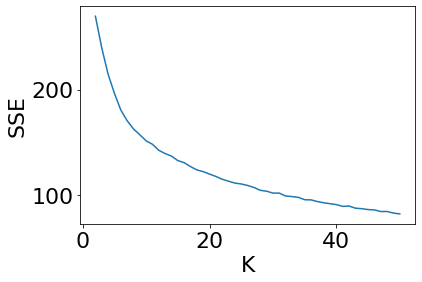

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.3914576189734 silhouette =  0.14907715027700136

k =  4 SSE =  214.53515370433388 silhouette =  0.16388098341056276

k =  5 SSE =  196.93107289461057 silhouette =  0.15374475117589256

k =  6 SSE =  180.5804880663535 silhouette =  0.16349845348741296

k =  7 SSE =  170.3810862201975 silhouette =  0.15601779795672752

k =  8 SSE =  162.41329838754245 silhouette =  0.15870384543026334

k =  9 SSE =  156.81930954049952 silhouette =  0.141791023669535

k =  10 SSE =  150.99108351850668 silhouette =  0.15134863997450354

k =  11 SSE =  146.74489246429079 silhouette =  0.1493118218058411

k =  12 SSE =  144.1534432772704 silhouette =  0.14355426471344657

k =  13 SSE =  139.2306048824004 silhouette =  0.1298646713690637

k =  14 SSE =  136.46359135247062 silhouette =  0.13050097743752656

k =  15 SSE =  132.77084580338897 silhouette =  0.13482889640621712

k =  16 SSE =  130.04006302117836 silhouette =  0.135

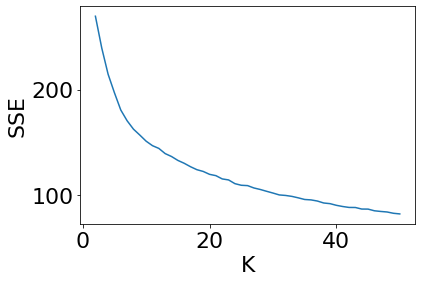

k =  2 SSE =  269.56111155841074 silhouette =  0.16186819272276579

k =  3 SSE =  239.40614400602922 silhouette =  0.1480510713933051

k =  4 SSE =  214.5011235306252 silhouette =  0.1638395256426279

k =  5 SSE =  196.4255457557604 silhouette =  0.15676480436173001

k =  6 SSE =  180.5837842733025 silhouette =  0.16359671697001488

k =  7 SSE =  170.42547110567313 silhouette =  0.15514248197098057

k =  8 SSE =  162.3375683107415 silhouette =  0.15911611514807067

k =  9 SSE =  155.60851234204287 silhouette =  0.15598468433236615

k =  10 SSE =  151.10592151983636 silhouette =  0.1488317771009197

k =  11 SSE =  147.2362241541573 silhouette =  0.13816635643821426

k =  12 SSE =  142.6957911914434 silhouette =  0.13635153954709328

k =  13 SSE =  140.16626072811994 silhouette =  0.13122565342035514

k =  14 SSE =  136.35752157554802 silhouette =  0.13609016326449058

k =  15 SSE =  133.2109646950824 silhouette =  0.1375459693526426

k =  16 SSE =  130.6123956119829 silhouette =  0.1389

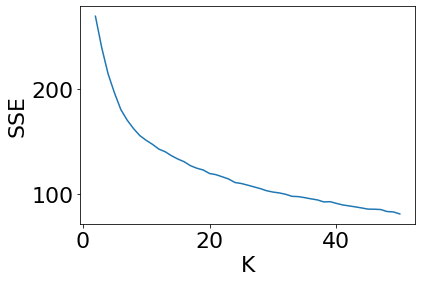

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.58049905551974 silhouette =  0.1438624875724942

k =  4 SSE =  214.64679072454717 silhouette =  0.1555321600939125

k =  5 SSE =  196.40129524911023 silhouette =  0.1534805283895621

k =  6 SSE =  180.59996314531256 silhouette =  0.16412877215868693

k =  7 SSE =  170.40958091676285 silhouette =  0.15791456297476017

k =  8 SSE =  162.46180643560254 silhouette =  0.15782227558107909

k =  9 SSE =  155.56152115460102 silhouette =  0.15717248481621843

k =  10 SSE =  151.01898413102015 silhouette =  0.14404896704187836

k =  11 SSE =  146.64935221145035 silhouette =  0.15063551348865598

k =  12 SSE =  142.61029503588253 silhouette =  0.13516410698971382

k =  13 SSE =  139.75309988322311 silhouette =  0.13977238334814993

k =  14 SSE =  135.3198579547299 silhouette =  0.1394341735261716

k =  15 SSE =  132.61658977688586 silhouette =  0.13100624182529955

k =  16 SSE =  130.12988233614686 silhouette =  0

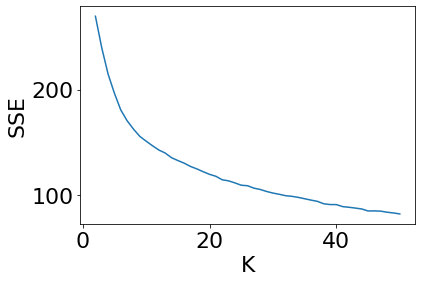

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  240.1403549982135 silhouette =  0.14408587814620985

k =  4 SSE =  214.6548245853659 silhouette =  0.15546241479717968

k =  5 SSE =  196.4044200523404 silhouette =  0.15728510858760247

k =  6 SSE =  180.60480246626733 silhouette =  0.16297605565937964

k =  7 SSE =  170.35713904308287 silhouette =  0.15666792496938606

k =  8 SSE =  162.41501233936967 silhouette =  0.1564090175264023

k =  9 SSE =  155.6727246872377 silhouette =  0.15531835292075793

k =  10 SSE =  151.1880098870318 silhouette =  0.14628513792833686

k =  11 SSE =  147.6633333500398 silhouette =  0.14175299420530474

k =  12 SSE =  143.3338293703723 silhouette =  0.141887599467549

k =  13 SSE =  139.03299299511684 silhouette =  0.1438780054119066

k =  14 SSE =  136.11882259261571 silhouette =  0.13583044381392387

k =  15 SSE =  133.37051230663988 silhouette =  0.13465378794431268

k =  16 SSE =  130.57042530158185 silhouette =  0.1253

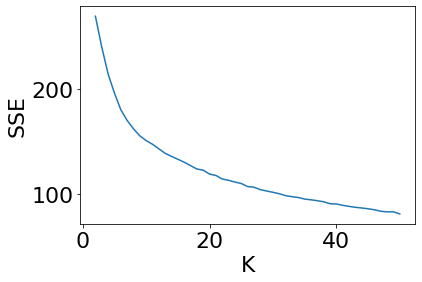

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.40614400602922 silhouette =  0.1480510713933051

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.33925693647106 silhouette =  0.15250087365690404

k =  6 SSE =  180.60603571694512 silhouette =  0.16455858567538983

k =  7 SSE =  170.48874146338903 silhouette =  0.15898667138333147

k =  8 SSE =  162.55334884546338 silhouette =  0.15703642885081018

k =  9 SSE =  155.72281987245816 silhouette =  0.1570474772952755

k =  10 SSE =  151.8330264776796 silhouette =  0.14934258688592333

k =  11 SSE =  146.65285035277745 silhouette =  0.13945949425589038

k =  12 SSE =  143.15143207274167 silhouette =  0.12661367200644108

k =  13 SSE =  140.4810857118282 silhouette =  0.13702088804684795

k =  14 SSE =  136.53378400361103 silhouette =  0.12694215086578955

k =  15 SSE =  133.1084391392629 silhouette =  0.14392082113161037

k =  16 SSE =  130.41279958047227 silhouette =  0

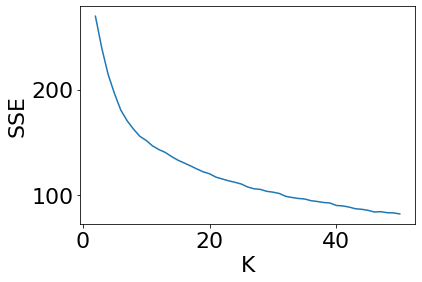

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.58049905551974 silhouette =  0.1438624875724942

k =  4 SSE =  214.50516680224743 silhouette =  0.16378056952703807

k =  5 SSE =  196.35870765473197 silhouette =  0.15156491852671175

k =  6 SSE =  180.58824599641034 silhouette =  0.1644114521350138

k =  7 SSE =  170.3553193528524 silhouette =  0.15670623135960582

k =  8 SSE =  162.3490376826895 silhouette =  0.15951666094436584

k =  9 SSE =  155.70692670170186 silhouette =  0.15779958124164492

k =  10 SSE =  151.47828265832925 silhouette =  0.14045274308507014

k =  11 SSE =  146.62216610504316 silhouette =  0.13471378325835429

k =  12 SSE =  143.37705601994958 silhouette =  0.13304799859701189

k =  13 SSE =  139.25849326424463 silhouette =  0.1381381452605449

k =  14 SSE =  136.69037414683038 silhouette =  0.13712880274786118

k =  15 SSE =  133.19059277142347 silhouette =  0.13847297247901907

k =  16 SSE =  129.96107503990748 silhouette =  

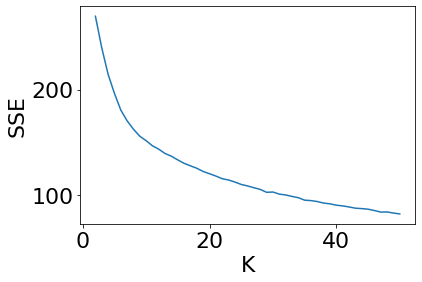

k =  2 SSE =  269.5604730389182 silhouette =  0.16186819272276579

k =  3 SSE =  239.41371331274595 silhouette =  0.14763348519435726

k =  4 SSE =  214.5223852346039 silhouette =  0.16296419343913324

k =  5 SSE =  196.39637945650244 silhouette =  0.1545570211927757

k =  6 SSE =  180.57822735712716 silhouette =  0.1645195712992588

k =  7 SSE =  170.39146733988326 silhouette =  0.15722168971648962

k =  8 SSE =  162.43069691160434 silhouette =  0.15774572303805218

k =  9 SSE =  155.5505550135435 silhouette =  0.15834246982740394

k =  10 SSE =  150.91694853677996 silhouette =  0.14875500660497668

k =  11 SSE =  147.59299170170743 silhouette =  0.14566130345342823

k =  12 SSE =  143.30266595903325 silhouette =  0.13543881489081647

k =  13 SSE =  140.5336238000279 silhouette =  0.13238128104106706

k =  14 SSE =  135.93849115491426 silhouette =  0.13774203725467263

k =  15 SSE =  132.98460915321476 silhouette =  0.12885392781870605

k =  16 SSE =  128.861155360231 silhouette =  0.

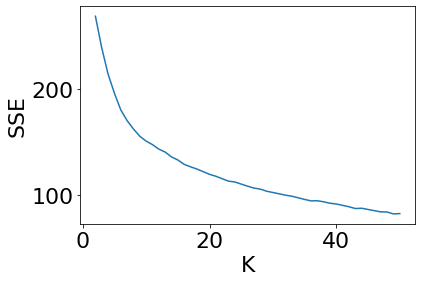

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.44662531755043 silhouette =  0.1452629073922157

k =  4 SSE =  214.499057367396 silhouette =  0.16361139982097217

k =  5 SSE =  196.92276678680753 silhouette =  0.1525421401794099

k =  6 SSE =  180.62186145061273 silhouette =  0.16184719870250305

k =  7 SSE =  170.41585393536545 silhouette =  0.15685868764975733

k =  8 SSE =  162.50067365924258 silhouette =  0.15861273158735073

k =  9 SSE =  155.557028631535 silhouette =  0.15630272550155064

k =  10 SSE =  150.97643215196413 silhouette =  0.1524020556150839

k =  11 SSE =  147.12620553619053 silhouette =  0.14229435243910124

k =  12 SSE =  142.95124453583026 silhouette =  0.1371195918455479

k =  13 SSE =  139.9127307905993 silhouette =  0.13343614695447342

k =  14 SSE =  136.75486033311162 silhouette =  0.13472774949880678

k =  15 SSE =  132.39402515299182 silhouette =  0.13181266783585477

k =  16 SSE =  130.2311048872794 silhouette =  0.1273

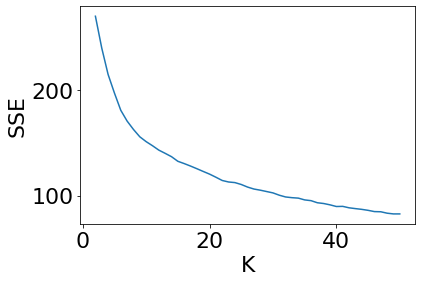

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.38621427483636 silhouette =  0.1492501236757868

k =  4 SSE =  214.5011235306252 silhouette =  0.1638395256426279

k =  5 SSE =  196.38376131007698 silhouette =  0.15156885622412902

k =  6 SSE =  180.5866216338918 silhouette =  0.16310676153439418

k =  7 SSE =  170.46116456054213 silhouette =  0.15746695073098282

k =  8 SSE =  162.40275535940432 silhouette =  0.1608737297853752

k =  9 SSE =  155.57374812435052 silhouette =  0.15655281991046902

k =  10 SSE =  151.3049351969031 silhouette =  0.1486924131557645

k =  11 SSE =  146.76070642230582 silhouette =  0.13685694438044024

k =  12 SSE =  143.5115538503151 silhouette =  0.13074426039848533

k =  13 SSE =  139.46212809269383 silhouette =  0.1363335478000765

k =  14 SSE =  136.61446483976886 silhouette =  0.12925094691757694

k =  15 SSE =  132.86844462990464 silhouette =  0.12934673474575104

k =  16 SSE =  131.1730666682284 silhouette =  0.1292

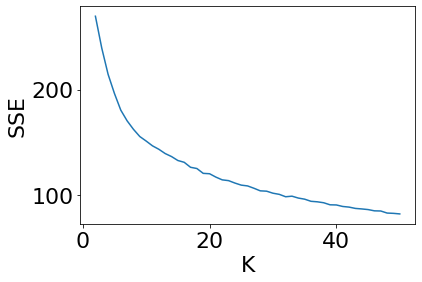

k =  2 SSE =  269.56451838327973 silhouette =  0.1615568647854286

k =  3 SSE =  239.44879889477482 silhouette =  0.145028230923313

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.38561287709285 silhouette =  0.1532947566015774

k =  6 SSE =  180.607119775049 silhouette =  0.16444563669887255

k =  7 SSE =  170.4838459329883 silhouette =  0.15892651580506423

k =  8 SSE =  162.46994703354494 silhouette =  0.15962941145913015

k =  9 SSE =  156.24491964207706 silhouette =  0.16059165593250224

k =  10 SSE =  150.93857879469041 silhouette =  0.1413154450976731

k =  11 SSE =  146.78609346386426 silhouette =  0.13590850987923808

k =  12 SSE =  142.75799411564228 silhouette =  0.13372862323225904

k =  13 SSE =  140.00152813044554 silhouette =  0.1460770172289533

k =  14 SSE =  135.54654649194293 silhouette =  0.138304657630335

k =  15 SSE =  133.08207594580233 silhouette =  0.1304777218448328

k =  16 SSE =  129.84151396523552 silhouette =  0.1380

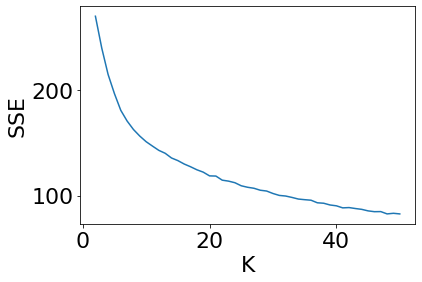

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.4997185858122 silhouette =  0.14352259755207844

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.92966966088056 silhouette =  0.1535185043097823

k =  6 SSE =  180.66696421258703 silhouette =  0.1601259927384081

k =  7 SSE =  170.37687575276942 silhouette =  0.15527780567457233

k =  8 SSE =  162.48257964746847 silhouette =  0.1584112312879047

k =  9 SSE =  155.55455264146784 silhouette =  0.156215938941621

k =  10 SSE =  151.43785611728026 silhouette =  0.14332148242007361

k =  11 SSE =  147.05618448872363 silhouette =  0.13209255630570635

k =  12 SSE =  143.07373450009197 silhouette =  0.12410814928392254

k =  13 SSE =  139.74865397733754 silhouette =  0.1334664679040047

k =  14 SSE =  136.53496573692757 silhouette =  0.13426472093503214

k =  15 SSE =  133.9397820059014 silhouette =  0.13612702027862575

k =  16 SSE =  130.0401974386864 silhouette =  0.129

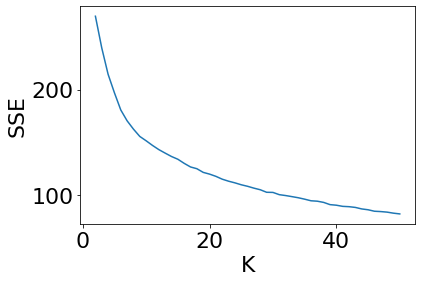

k =  2 SSE =  269.5611355868094 silhouette =  0.16186819272276579

k =  3 SSE =  239.40614400602922 silhouette =  0.1480510713933051

k =  4 SSE =  214.49959587459614 silhouette =  0.16369782513007475

k =  5 SSE =  196.36535326892778 silhouette =  0.1530592036727215

k =  6 SSE =  180.58512623664018 silhouette =  0.16390780187220994

k =  7 SSE =  170.37240169756421 silhouette =  0.15538050971337522

k =  8 SSE =  162.59199420345595 silhouette =  0.1593943119802167

k =  9 SSE =  155.59632218835515 silhouette =  0.153858935675751

k =  10 SSE =  151.00913628652833 silhouette =  0.14699121271003368

k =  11 SSE =  146.59443740135399 silhouette =  0.15187876158029226

k =  12 SSE =  143.91871077235862 silhouette =  0.13473738837880606

k =  13 SSE =  139.6982696111773 silhouette =  0.12851169303104468

k =  14 SSE =  136.1286087163768 silhouette =  0.13202901234243924

k =  15 SSE =  132.30956928386982 silhouette =  0.13535906211030127

k =  16 SSE =  130.92499018983747 silhouette =  0.

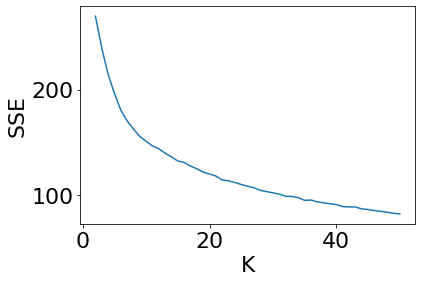

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  240.1056361976595 silhouette =  0.1454304752804804

k =  4 SSE =  214.49905736739595 silhouette =  0.16361139982097217

k =  5 SSE =  196.36239298299074 silhouette =  0.15268575193266368

k =  6 SSE =  180.57989105834713 silhouette =  0.1631941286369829

k =  7 SSE =  170.4065207374973 silhouette =  0.15695452136585694

k =  8 SSE =  162.58528707656401 silhouette =  0.15695508939048253

k =  9 SSE =  155.654773183205 silhouette =  0.15688368086722312

k =  10 SSE =  150.87467194697933 silhouette =  0.14125425671828384

k =  11 SSE =  147.1872824656136 silhouette =  0.13980019364604096

k =  12 SSE =  143.45794666153174 silhouette =  0.14289078332948388

k =  13 SSE =  139.32370602464562 silhouette =  0.13243655828743797

k =  14 SSE =  135.5712436322908 silhouette =  0.13299022245578987

k =  15 SSE =  132.43050078951993 silhouette =  0.12842077451446557

k =  16 SSE =  129.16467651894146 silhouette =  0.13

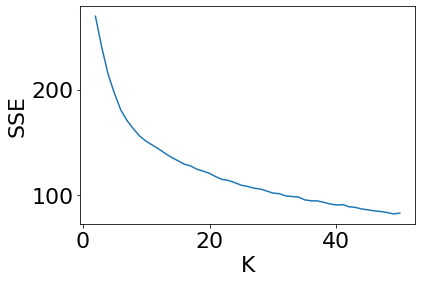

k =  2 SSE =  269.56239190782014 silhouette =  0.16206189221878642

k =  3 SSE =  239.42952000975006 silhouette =  0.14754565964683578

k =  4 SSE =  214.49959587459614 silhouette =  0.16369782513007475

k =  5 SSE =  196.398999670006 silhouette =  0.15540305406207505

k =  6 SSE =  180.61261185948254 silhouette =  0.1645762192557658

k =  7 SSE =  170.40316653075055 silhouette =  0.15744332255908677

k =  8 SSE =  162.32759975860526 silhouette =  0.16193992912842375

k =  9 SSE =  155.55899740210378 silhouette =  0.15465359820922164

k =  10 SSE =  151.12688165784525 silhouette =  0.14048927451285206

k =  11 SSE =  146.44727394488427 silhouette =  0.15001659170376377

k =  12 SSE =  143.03590991797165 silhouette =  0.12777332585081005

k =  13 SSE =  139.07227301653725 silhouette =  0.13121554130836832

k =  14 SSE =  135.95842477966144 silhouette =  0.13139655060753122

k =  15 SSE =  133.14671092676647 silhouette =  0.1296844557464723

k =  16 SSE =  130.01322486629874 silhouette =

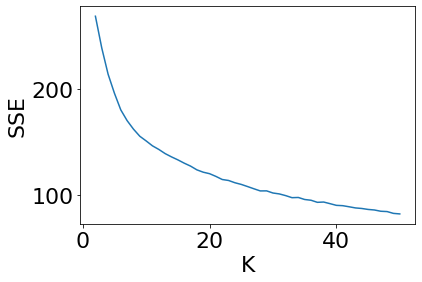

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.4182071050632 silhouette =  0.1506771888337542

k =  4 SSE =  214.50865584706995 silhouette =  0.16288165649822925

k =  5 SSE =  196.3926791717584 silhouette =  0.15423950778622408

k =  6 SSE =  180.5857192297086 silhouette =  0.16372886538923123

k =  7 SSE =  170.46921340686018 silhouette =  0.15772625182789018

k =  8 SSE =  162.33923010052322 silhouette =  0.16162194114345266

k =  9 SSE =  155.7276781927436 silhouette =  0.15656779586815453

k =  10 SSE =  150.91463845585275 silhouette =  0.13879182847614585

k =  11 SSE =  147.33625151675753 silhouette =  0.13810335360512363

k =  12 SSE =  143.67464879840554 silhouette =  0.1305361852317395

k =  13 SSE =  139.49161171214897 silhouette =  0.13387318701256648

k =  14 SSE =  136.1892307467613 silhouette =  0.13250339059059138

k =  15 SSE =  133.56107533435892 silhouette =  0.13531302640102583

k =  16 SSE =  130.57048447748022 silhouette =  0.1

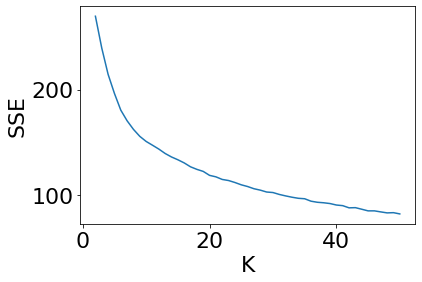

k =  2 SSE =  269.56111155841074 silhouette =  0.16186819272276579

k =  3 SSE =  239.41318284096718 silhouette =  0.14984696900802896

k =  4 SSE =  214.49959587459614 silhouette =  0.16369782513007475

k =  5 SSE =  196.94026213766293 silhouette =  0.15362155108677691

k =  6 SSE =  180.6166215162223 silhouette =  0.16471064024759202

k =  7 SSE =  170.52016934131615 silhouette =  0.15488213809548196

k =  8 SSE =  162.36144445128022 silhouette =  0.16080800981504925

k =  9 SSE =  156.85411648639632 silhouette =  0.13839557742962627

k =  10 SSE =  150.9042117251868 silhouette =  0.1381418016731646

k =  11 SSE =  146.86082264640066 silhouette =  0.12510307810321125

k =  12 SSE =  142.9282634777137 silhouette =  0.12333529880140941

k =  13 SSE =  139.34485996267915 silhouette =  0.1350495997548658

k =  14 SSE =  136.34250496851448 silhouette =  0.1297350098192246

k =  15 SSE =  132.71793381913446 silhouette =  0.13485100950183065

k =  16 SSE =  130.3023569717312 silhouette =  0

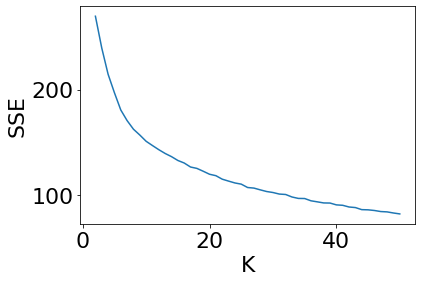

k =  2 SSE =  269.561140878493 silhouette =  0.16231879922567632

k =  3 SSE =  239.4022493430925 silhouette =  0.14754416025805295

k =  4 SSE =  214.499057367396 silhouette =  0.16361139982097217

k =  5 SSE =  196.35942359027473 silhouette =  0.15210077732284158

k =  6 SSE =  180.5832353883301 silhouette =  0.16322452446476854

k =  7 SSE =  170.39125106405038 silhouette =  0.15645399167034302

k =  8 SSE =  162.34500454387995 silhouette =  0.15941726208807086

k =  9 SSE =  155.87741134982267 silhouette =  0.15498210981017854

k =  10 SSE =  151.59983251040805 silhouette =  0.14730298047522367

k =  11 SSE =  147.62375687449355 silhouette =  0.1367773072350973

k =  12 SSE =  143.82468015436868 silhouette =  0.13285046564650563

k =  13 SSE =  139.37777490686085 silhouette =  0.13646576951048608

k =  14 SSE =  136.2761428289416 silhouette =  0.12887133609037305

k =  15 SSE =  133.76820724443039 silhouette =  0.1299615945268294

k =  16 SSE =  129.83657494577818 silhouette =  0.1

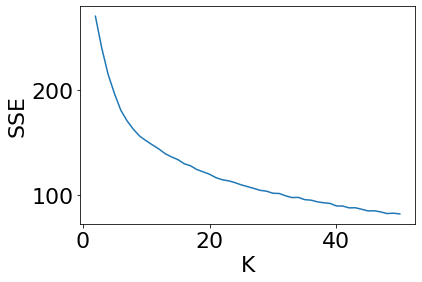

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.41371331274595 silhouette =  0.14763348519435726

k =  4 SSE =  214.64894620034113 silhouette =  0.1555647537714724

k =  5 SSE =  196.35492162035473 silhouette =  0.1514048398737791

k =  6 SSE =  180.584622488721 silhouette =  0.16347813000607617

k =  7 SSE =  170.40200315710257 silhouette =  0.15688535968425665

k =  8 SSE =  162.4948015728945 silhouette =  0.15855986475834585

k =  9 SSE =  155.64118480027014 silhouette =  0.1558556076915421

k =  10 SSE =  151.01068774029932 silhouette =  0.13904826986189062

k =  11 SSE =  146.98899878185463 silhouette =  0.13467987343155444

k =  12 SSE =  143.98872471147772 silhouette =  0.13014823336270548

k =  13 SSE =  139.54265865091423 silhouette =  0.12528763073573346

k =  14 SSE =  136.55604676488252 silhouette =  0.13371837411383086

k =  15 SSE =  133.66069706536814 silhouette =  0.1286242003435026

k =  16 SSE =  130.0606700124083 silhouette =  0.1

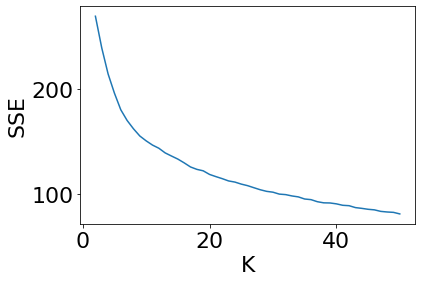

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.41757656728538 silhouette =  0.14743742232618273

k =  4 SSE =  214.49783007133342 silhouette =  0.16392184417619227

k =  5 SSE =  196.3583359390057 silhouette =  0.15186350384776356

k =  6 SSE =  180.60514615575556 silhouette =  0.16395798642710854

k =  7 SSE =  170.3772120925717 silhouette =  0.1569615565212562

k =  8 SSE =  162.42174410767268 silhouette =  0.16008405268646025

k =  9 SSE =  155.6013799748722 silhouette =  0.1536847031685845

k =  10 SSE =  151.22666607695504 silhouette =  0.1340113157868704

k =  11 SSE =  146.56731119712387 silhouette =  0.133467965933854

k =  12 SSE =  142.99267408430444 silhouette =  0.12585505694541574

k =  13 SSE =  139.9479804359328 silhouette =  0.13508771514264054

k =  14 SSE =  136.26915116099494 silhouette =  0.13799195331822364

k =  15 SSE =  133.23954556882657 silhouette =  0.13628790844455277

k =  16 SSE =  130.0565994218042 silhouette =  0.133

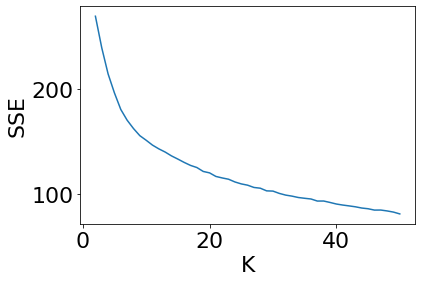

k =  2 SSE =  269.56266685480415 silhouette =  0.16247375020707405

k =  3 SSE =  239.5811426733128 silhouette =  0.14276682597227108

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.43955187377824 silhouette =  0.15567091403700853

k =  6 SSE =  180.5914800352111 silhouette =  0.16379547139764666

k =  7 SSE =  170.37410237478693 silhouette =  0.15673313211097178

k =  8 SSE =  162.51705042554931 silhouette =  0.15727439232450208

k =  9 SSE =  155.56277182665582 silhouette =  0.15808495177144832

k =  10 SSE =  150.92375371295196 silhouette =  0.1496493722759517

k =  11 SSE =  146.54912304124198 silhouette =  0.13314135308396632

k =  12 SSE =  143.946155243757 silhouette =  0.13303973556365706

k =  13 SSE =  139.49892401660253 silhouette =  0.13518771400987178

k =  14 SSE =  135.29937606264534 silhouette =  0.1383807894848669

k =  15 SSE =  132.56986289188538 silhouette =  0.13338260980161895

k =  16 SSE =  129.95413568576816 silhouette =  

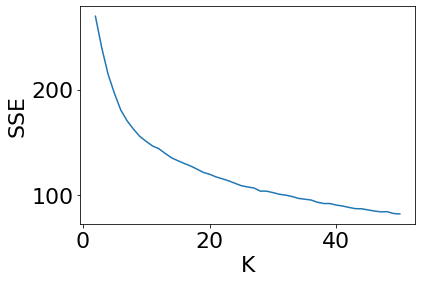

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.43586710210428 silhouette =  0.14608379871788485

k =  4 SSE =  214.50932704180894 silhouette =  0.1634516198821826

k =  5 SSE =  196.40568325158836 silhouette =  0.15356421589690303

k =  6 SSE =  180.5944848984811 silhouette =  0.16367439087974284

k =  7 SSE =  170.50520426281844 silhouette =  0.16015785296927917

k =  8 SSE =  162.46501227192658 silhouette =  0.1595789850523064

k =  9 SSE =  155.57615044609696 silhouette =  0.15484506384341717

k =  10 SSE =  150.8007067562649 silhouette =  0.1393845165649506

k =  11 SSE =  146.88175388171402 silhouette =  0.14663652978746186

k =  12 SSE =  143.21539856218888 silhouette =  0.1324031089479715

k =  13 SSE =  139.48294638399722 silhouette =  0.12947140110054772

k =  14 SSE =  136.69780543823407 silhouette =  0.13260904830756431

k =  15 SSE =  133.01506049411284 silhouette =  0.12932283623972274

k =  16 SSE =  129.92834490195506 silhouette =  0.

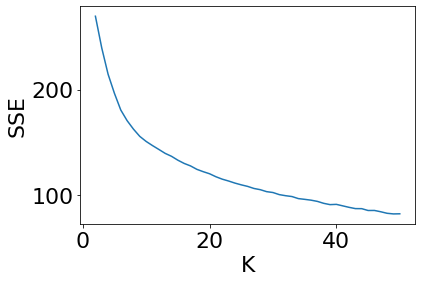

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.59272958571577 silhouette =  0.14369493277045897

k =  4 SSE =  214.65424747370733 silhouette =  0.15618266666164032

k =  5 SSE =  196.3654845011237 silhouette =  0.15146503513268475

k =  6 SSE =  180.5881085555979 silhouette =  0.16374855293153834

k =  7 SSE =  170.38245323887108 silhouette =  0.15654111390683362

k =  8 SSE =  162.32542296965164 silhouette =  0.15868283356556256

k =  9 SSE =  155.61450173894625 silhouette =  0.1555338025578011

k =  10 SSE =  151.10411149989264 silhouette =  0.13439850493380054

k =  11 SSE =  146.55644681079303 silhouette =  0.15101482271644426

k =  12 SSE =  142.671049523299 silhouette =  0.13315031186627221

k =  13 SSE =  140.04677845068633 silhouette =  0.13127969948116536

k =  14 SSE =  136.33578082938098 silhouette =  0.1335521295102001

k =  15 SSE =  132.96454324806362 silhouette =  0.13411207554645665

k =  16 SSE =  129.8622599172782 silhouette =  0.

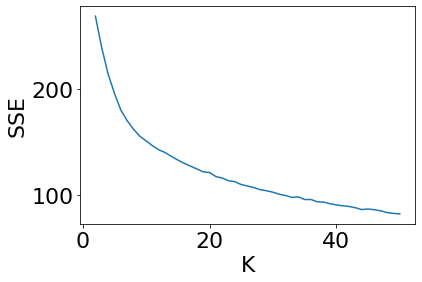

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.44662531755046 silhouette =  0.1452629073922157

k =  4 SSE =  214.499057367396 silhouette =  0.16361139982097217

k =  5 SSE =  196.4255457557604 silhouette =  0.15676480436173001

k =  6 SSE =  180.63472152879004 silhouette =  0.16133495564575392

k =  7 SSE =  170.40758503906775 silhouette =  0.15650011909116618

k =  8 SSE =  162.34263276209 silhouette =  0.16167142659474987

k =  9 SSE =  155.58166752197766 silhouette =  0.15703313464521124

k =  10 SSE =  150.86362070499433 silhouette =  0.14026412820605139

k =  11 SSE =  146.67990556984782 silhouette =  0.13735661618191825

k =  12 SSE =  143.5535188346877 silhouette =  0.13402796653579077

k =  13 SSE =  138.88623975680747 silhouette =  0.13710528591307672

k =  14 SSE =  135.74835349752135 silhouette =  0.13643523738165975

k =  15 SSE =  133.16910437416982 silhouette =  0.1357568952928765

k =  16 SSE =  129.8664846510529 silhouette =  0.1347

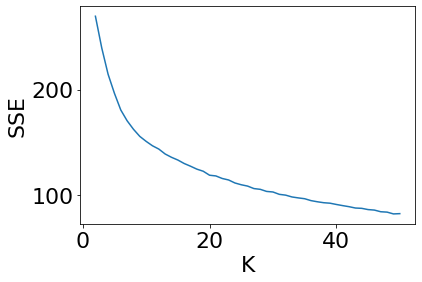

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.45061922121343 silhouette =  0.14558342060692903

k =  4 SSE =  214.50516680224743 silhouette =  0.16378056952703807

k =  5 SSE =  196.39113410489128 silhouette =  0.15569298913496127

k =  6 SSE =  180.6318347488353 silhouette =  0.16103211857395022

k =  7 SSE =  170.3730689813204 silhouette =  0.15775653212976704

k =  8 SSE =  162.36453881653452 silhouette =  0.16051451286862667

k =  9 SSE =  155.66663958997844 silhouette =  0.15670609779088956

k =  10 SSE =  150.9749468919718 silhouette =  0.14994001084750172

k =  11 SSE =  146.9947072740199 silhouette =  0.13749942512373348

k =  12 SSE =  143.23873567972154 silhouette =  0.1298027599814581

k =  13 SSE =  139.79895029793943 silhouette =  0.13636403341210201

k =  14 SSE =  136.69532120718546 silhouette =  0.12971729048800884

k =  15 SSE =  133.2271124491643 silhouette =  0.1338256681777503

k =  16 SSE =  129.45594701421206 silhouette =  0.1

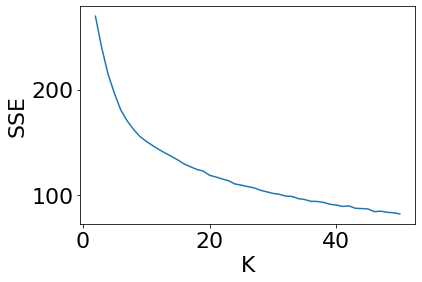

k =  2 SSE =  269.56111155841074 silhouette =  0.16186819272276579

k =  3 SSE =  239.58076683458003 silhouette =  0.14361601591360032

k =  4 SSE =  214.49783007133342 silhouette =  0.16392184417619227

k =  5 SSE =  196.4103018589965 silhouette =  0.156782559307751

k =  6 SSE =  180.59504102664937 silhouette =  0.16409661712844895

k =  7 SSE =  170.4457899571182 silhouette =  0.15585410816848214

k =  8 SSE =  162.43274700637758 silhouette =  0.1588635832362313

k =  9 SSE =  155.64017103530205 silhouette =  0.1567460426346866

k =  10 SSE =  151.2149341943757 silhouette =  0.14247495110908492

k =  11 SSE =  147.13228494537609 silhouette =  0.14767630479487837

k =  12 SSE =  143.40115203163887 silhouette =  0.12451112844739662

k =  13 SSE =  140.69680207222174 silhouette =  0.12606376086542417

k =  14 SSE =  136.30904417214856 silhouette =  0.1368825532097819

k =  15 SSE =  132.78909744192333 silhouette =  0.12883792772516414

k =  16 SSE =  129.22893158982694 silhouette =  0.

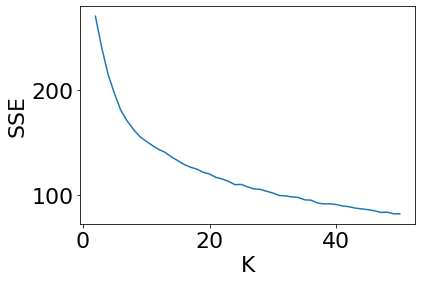

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  240.11697703466874 silhouette =  0.14571677649959597

k =  4 SSE =  214.64962480225677 silhouette =  0.15606049665329488

k =  5 SSE =  196.40252410211573 silhouette =  0.15784214719791592

k =  6 SSE =  180.63604484366945 silhouette =  0.16005623217825835

k =  7 SSE =  170.39151740811724 silhouette =  0.15657437475228833

k =  8 SSE =  162.46661386139374 silhouette =  0.15712444927905392

k =  9 SSE =  156.0353355721668 silhouette =  0.15237412627212013

k =  10 SSE =  151.51740527509995 silhouette =  0.1553426077960485

k =  11 SSE =  146.83141017658886 silhouette =  0.14009882361186446

k =  12 SSE =  143.6836913080908 silhouette =  0.1402415720560252

k =  13 SSE =  139.33609188670246 silhouette =  0.1414032771886982

k =  14 SSE =  136.09257571692697 silhouette =  0.13198188893301185

k =  15 SSE =  132.70024717566085 silhouette =  0.1305083499799494

k =  16 SSE =  129.8385341399606 silhouette =  0.

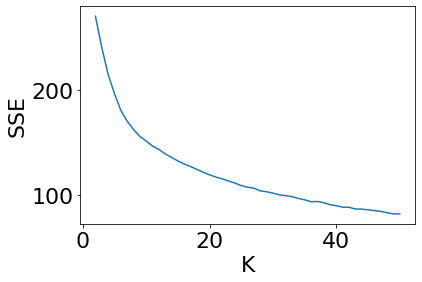

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.4151909509906 silhouette =  0.14755447041802663

k =  4 SSE =  214.499057367396 silhouette =  0.16361139982097217

k =  5 SSE =  196.43080671152276 silhouette =  0.15778893944064568

k =  6 SSE =  180.59359678059923 silhouette =  0.16409607257861278

k =  7 SSE =  170.40069543933583 silhouette =  0.15674172540614245

k =  8 SSE =  162.36302769219915 silhouette =  0.1614220470746312

k =  9 SSE =  157.336804954468 silhouette =  0.13561087938715646

k =  10 SSE =  151.05037206747946 silhouette =  0.14968742795074488

k =  11 SSE =  147.18998777916462 silhouette =  0.13899404586278466

k =  12 SSE =  142.96345901359246 silhouette =  0.13496435280179475

k =  13 SSE =  139.29260033923998 silhouette =  0.12523525926970167

k =  14 SSE =  136.10263560992604 silhouette =  0.1307358359087448

k =  15 SSE =  133.26641004702466 silhouette =  0.1280472369653601

k =  16 SSE =  130.0342483710855 silhouette =  0.127

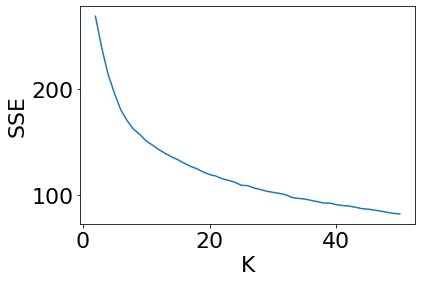

k =  2 SSE =  269.56075331488233 silhouette =  0.16186819272276579

k =  3 SSE =  239.46325391739848 silhouette =  0.14453809723036892

k =  4 SSE =  214.49783007133342 silhouette =  0.16392184417619227

k =  5 SSE =  196.34893456835343 silhouette =  0.15194564367701133

k =  6 SSE =  180.60309792792967 silhouette =  0.16441557919450123

k =  7 SSE =  170.3498775499282 silhouette =  0.15656350675942762

k =  8 SSE =  162.8780156239126 silhouette =  0.15987268045416914

k =  9 SSE =  155.7376965936404 silhouette =  0.15668196559968176

k =  10 SSE =  151.4839499047909 silhouette =  0.14590250979838149

k =  11 SSE =  146.58987600646978 silhouette =  0.13210734501706575

k =  12 SSE =  142.81414040181394 silhouette =  0.13216108736714524

k =  13 SSE =  138.87172603251292 silhouette =  0.13655550997659835

k =  14 SSE =  135.2119129040079 silhouette =  0.14201143128763855

k =  15 SSE =  132.88447335670364 silhouette =  0.1257750971125679

k =  16 SSE =  129.9465947363915 silhouette =  0

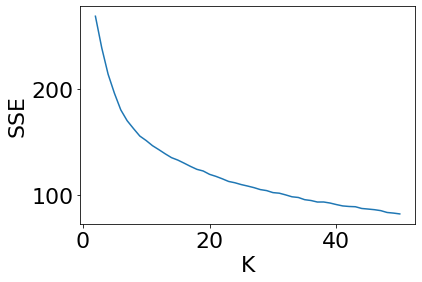

k =  2 SSE =  269.558839519018 silhouette =  0.16234467392916038

k =  3 SSE =  239.58076683458003 silhouette =  0.14361601591360032

k =  4 SSE =  214.53822553822263 silhouette =  0.16476615941616696

k =  5 SSE =  196.35627545009666 silhouette =  0.15318305305386581

k =  6 SSE =  180.67125274010436 silhouette =  0.15948088347525025

k =  7 SSE =  170.37336868400322 silhouette =  0.15629189805426

k =  8 SSE =  162.40664140477327 silhouette =  0.15842440624722204

k =  9 SSE =  155.84896320592478 silhouette =  0.15856539354159555

k =  10 SSE =  151.07987657864678 silhouette =  0.14939026884112983

k =  11 SSE =  147.3615060384441 silhouette =  0.14894254248186203

k =  12 SSE =  142.87595403645528 silhouette =  0.13528866112943885

k =  13 SSE =  139.83901486135545 silhouette =  0.13692518473974

k =  14 SSE =  136.44433039804676 silhouette =  0.138434254538288

k =  15 SSE =  133.34671136717253 silhouette =  0.13140800206879483

k =  16 SSE =  129.71938265360419 silhouette =  0.132

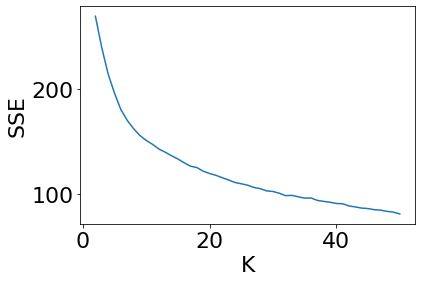

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.5102282971889 silhouette =  0.1434083711445415

k =  4 SSE =  214.499057367396 silhouette =  0.16361139982097217

k =  5 SSE =  196.4107453238351 silhouette =  0.15743435713557383

k =  6 SSE =  180.57640080331555 silhouette =  0.16402461902127183

k =  7 SSE =  170.48262208447375 silhouette =  0.15815425188880963

k =  8 SSE =  162.3125468045691 silhouette =  0.15822817954960725

k =  9 SSE =  155.5524527730262 silhouette =  0.15633238870788857

k =  10 SSE =  151.00160094100227 silhouette =  0.15045311668461872

k =  11 SSE =  146.5158266343067 silhouette =  0.14461366947376325

k =  12 SSE =  143.56676256295037 silhouette =  0.13226333686925493

k =  13 SSE =  139.19170367687954 silhouette =  0.1341020512341151

k =  14 SSE =  136.29183456815977 silhouette =  0.13296705189949

k =  15 SSE =  132.45573686702062 silhouette =  0.13271009962210265

k =  16 SSE =  130.28887029945028 silhouette =  0.12894

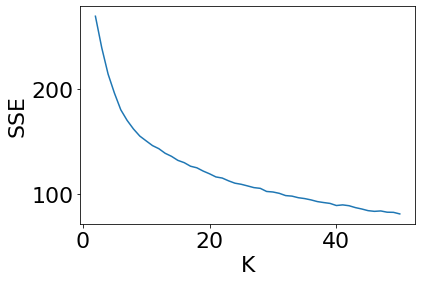

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.44225687485388 silhouette =  0.14614400534564378

k =  4 SSE =  214.48563590367255 silhouette =  0.16408030042440772

k =  5 SSE =  196.35318226231865 silhouette =  0.15212960111993015

k =  6 SSE =  180.57824779749203 silhouette =  0.16419150949334907

k =  7 SSE =  170.42202427142044 silhouette =  0.1553427615251466

k =  8 SSE =  162.42893015024833 silhouette =  0.1585894743923417

k =  9 SSE =  156.56763420554984 silhouette =  0.15745146035122687

k =  10 SSE =  152.17982434154771 silhouette =  0.15155325645128562

k =  11 SSE =  147.03610946992023 silhouette =  0.1435341774719433

k =  12 SSE =  143.82376645885836 silhouette =  0.128292183784907

k =  13 SSE =  138.64543751838752 silhouette =  0.1348577249191972

k =  14 SSE =  136.28539506197853 silhouette =  0.1297631565837354

k =  15 SSE =  132.08906920645902 silhouette =  0.13781654698291707

k =  16 SSE =  130.30380237897435 silhouette =  0.

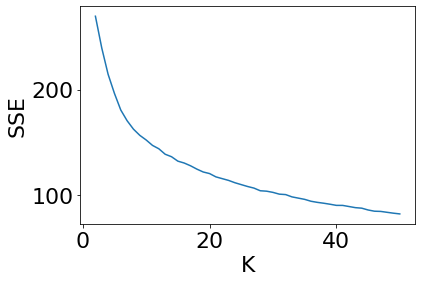

k =  2 SSE =  269.57266363303074 silhouette =  0.16030155278065375

k =  3 SSE =  239.46212548934622 silhouette =  0.144472445783283

k =  4 SSE =  214.53985743419463 silhouette =  0.16462371905202153

k =  5 SSE =  196.36819415505335 silhouette =  0.15115067287135195

k =  6 SSE =  180.61840472179156 silhouette =  0.16479116979344144

k =  7 SSE =  170.37578343178862 silhouette =  0.15674457982841122

k =  8 SSE =  162.36389298164394 silhouette =  0.159670368865867

k =  9 SSE =  155.62734148673488 silhouette =  0.15721742297191033

k =  10 SSE =  150.86811706132997 silhouette =  0.13484503654329685

k =  11 SSE =  146.29037404067506 silhouette =  0.15071929297824654

k =  12 SSE =  143.80436621721876 silhouette =  0.13737751855910602

k =  13 SSE =  140.20185996940788 silhouette =  0.13182998344207614

k =  14 SSE =  136.71284512453485 silhouette =  0.13289574907776927

k =  15 SSE =  132.49818324718478 silhouette =  0.13145018841920864

k =  16 SSE =  129.05629159527072 silhouette =

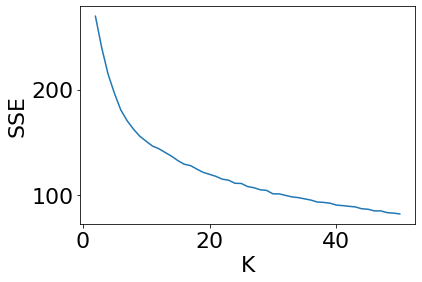

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.4112446681371 silhouette =  0.1499036575685809

k =  4 SSE =  214.48563590367255 silhouette =  0.16408030042440772

k =  5 SSE =  196.40252410211573 silhouette =  0.15784214719791592

k =  6 SSE =  180.590542281388 silhouette =  0.1636737793842107

k =  7 SSE =  170.40026871146748 silhouette =  0.15557452370027108

k =  8 SSE =  162.3389393022776 silhouette =  0.16156922019482403

k =  9 SSE =  156.82684880418952 silhouette =  0.14323928333260053

k =  10 SSE =  151.2512576113701 silhouette =  0.14412760935338617

k =  11 SSE =  146.54504353410263 silhouette =  0.1445622809844566

k =  12 SSE =  144.06281630515875 silhouette =  0.13531806165592664

k =  13 SSE =  140.05423604784554 silhouette =  0.13047777262515042

k =  14 SSE =  136.54488917501473 silhouette =  0.1356056727972564

k =  15 SSE =  133.1099620536292 silhouette =  0.13883318209966425

k =  16 SSE =  131.12478205171467 silhouette =  0.128

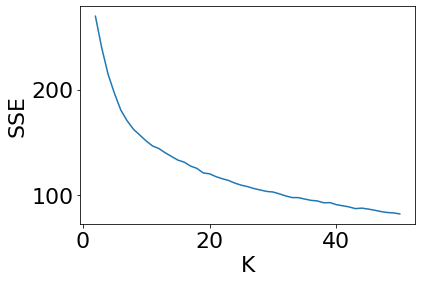

k =  2 SSE =  269.56111155841074 silhouette =  0.16186819272276579

k =  3 SSE =  239.40614400602922 silhouette =  0.1480510713933051

k =  4 SSE =  214.49959587459614 silhouette =  0.16369782513007475

k =  5 SSE =  196.36239298299074 silhouette =  0.15268575193266368

k =  6 SSE =  180.59409460858558 silhouette =  0.163250136895948

k =  7 SSE =  170.35030301535193 silhouette =  0.15638580801414476

k =  8 SSE =  162.40820695401368 silhouette =  0.16058040895824383

k =  9 SSE =  156.11076907732536 silhouette =  0.15353770041353426

k =  10 SSE =  151.1316939069732 silhouette =  0.1539040583822876

k =  11 SSE =  146.80037446424024 silhouette =  0.14755673810685013

k =  12 SSE =  143.5257131766959 silhouette =  0.12877462044905275

k =  13 SSE =  139.36646861453298 silhouette =  0.13688429666398383

k =  14 SSE =  135.79847413257255 silhouette =  0.13476980062394556

k =  15 SSE =  132.98705832931805 silhouette =  0.1309805916520657

k =  16 SSE =  130.53303438389932 silhouette =  0

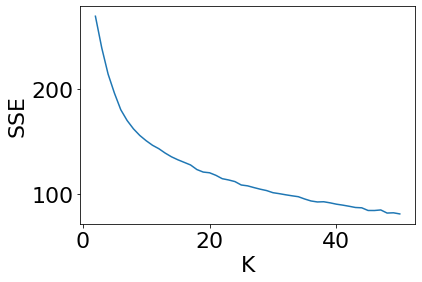

k =  2 SSE =  269.56239190782014 silhouette =  0.16206189221878642

k =  3 SSE =  239.47792411236406 silhouette =  0.14375872808170856

k =  4 SSE =  214.49523438334654 silhouette =  0.16334562460216315

k =  5 SSE =  196.40611204782925 silhouette =  0.15299067633091754

k =  6 SSE =  180.58739929459173 silhouette =  0.16410704065673415

k =  7 SSE =  170.36859770828806 silhouette =  0.15724294062277688

k =  8 SSE =  162.46689813604277 silhouette =  0.1609856884527934

k =  9 SSE =  155.56041644286958 silhouette =  0.15615654618323654

k =  10 SSE =  151.0899073189439 silhouette =  0.14939178578448314

k =  11 SSE =  147.18350079405846 silhouette =  0.1389928220320757

k =  12 SSE =  142.6510538786489 silhouette =  0.1292010730761417

k =  13 SSE =  139.481349261514 silhouette =  0.1304908235853628

k =  14 SSE =  135.8845618145469 silhouette =  0.1366187046096379

k =  15 SSE =  132.6018626311994 silhouette =  0.13567647329162327

k =  16 SSE =  130.34169685515207 silhouette =  0.129

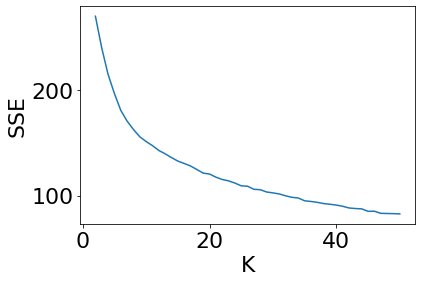

k =  2 SSE =  269.5599355831012 silhouette =  0.16234467392916038

k =  3 SSE =  239.42868800937498 silhouette =  0.1468034253427755

k =  4 SSE =  214.48563590367255 silhouette =  0.16408030042440772

k =  5 SSE =  196.37033385407094 silhouette =  0.15428647303429638

k =  6 SSE =  180.5696646658828 silhouette =  0.16415407768794876

k =  7 SSE =  170.3999205072404 silhouette =  0.1583295672272578

k =  8 SSE =  162.49236689917925 silhouette =  0.1588718869336605

k =  9 SSE =  155.5802855694168 silhouette =  0.1554318937041435

k =  10 SSE =  151.56874229934604 silhouette =  0.13108606423900188

k =  11 SSE =  146.742672090864 silhouette =  0.13886707292684983

k =  12 SSE =  143.2900490053514 silhouette =  0.13016620626362654

k =  13 SSE =  139.03998842942022 silhouette =  0.13994376785289103

k =  14 SSE =  136.43019261664838 silhouette =  0.13215212706834134

k =  15 SSE =  132.8094355091432 silhouette =  0.13078043781257456

k =  16 SSE =  129.7745692155463 silhouette =  0.12599

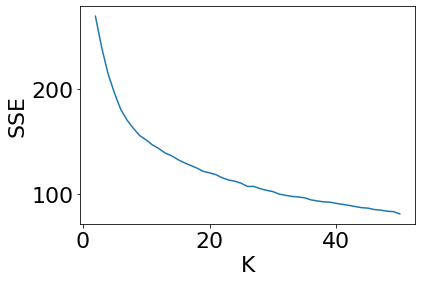

k =  2 SSE =  269.56111155841074 silhouette =  0.16186819272276579

k =  3 SSE =  240.03498187857107 silhouette =  0.14331568988773546

k =  4 SSE =  214.50516680224743 silhouette =  0.16378056952703807

k =  5 SSE =  196.33925693647112 silhouette =  0.15250087365690404

k =  6 SSE =  180.6166215162223 silhouette =  0.16471064024759202

k =  7 SSE =  170.40527668491714 silhouette =  0.15513647663070962

k =  8 SSE =  162.35904157663953 silhouette =  0.15999028793998638

k =  9 SSE =  155.65211028933587 silhouette =  0.1591861562167894

k =  10 SSE =  150.98532877814804 silhouette =  0.14723404498016285

k =  11 SSE =  146.8490933537911 silhouette =  0.12631404465949708

k =  12 SSE =  142.59098636835023 silhouette =  0.14848807961442023

k =  13 SSE =  139.88806694918657 silhouette =  0.13783924134139017

k =  14 SSE =  135.9376162477806 silhouette =  0.13354807574762978

k =  15 SSE =  133.52584627381404 silhouette =  0.13157737136628986

k =  16 SSE =  130.17482070891123 silhouette =

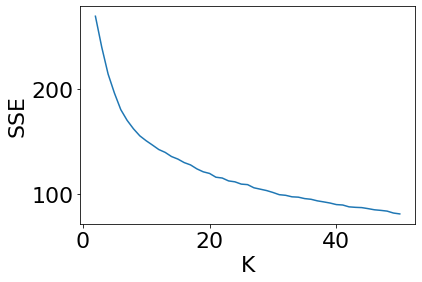

In [12]:
for i in range(0, 50):
    sse_list = list()
    max_k = 50
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, algorithm='full')
        kmeans.fit(train_data)
        sse = kmeans.inertia_
        sse_list.append(sse)

        print("k = ", k, "SSE = ", sse, "silhouette = ", silhouette_score(train_data, kmeans.labels_))
        print()
        
    plt.plot(range(2, len(sse_list) + 2), sse_list)
    plt.ylabel('SSE', fontsize=22)
    plt.xlabel('K', fontsize=22)
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.show()

In [13]:
kmeans = KMeans(n_clusters=6, init = 'k-means++', n_init=1000, max_iter=10000, algorithm='full')
kmeans.fit(train_data)
hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
print ('centers', kmeans.cluster_centers_)
print()
print ('labels', dict(zip(bins, hist)))
print ('sse', kmeans.inertia_)
print ('silhouette', silhouette_score(train_data, kmeans.labels_))

centers [[0.38104223 0.23629546 0.14759032 0.23433962 0.20448113 0.14150943
  0.63962264]
 [0.41043956 0.72527171 0.16829927 0.27692308 0.23413462 0.24615385
  0.52307692]
 [0.52398459 0.33324283 0.19676644 0.33455882 0.47058824 0.64522059
  0.48161765]
 [0.59327217 0.2915677  0.25209306 0.66834862 0.18405963 0.09633028
  0.50688073]
 [0.40955199 0.30183956 0.16689155 0.24615385 0.17751479 0.12130178
  0.13609467]
 [0.41377091 0.54606564 0.78143239 0.28716216 0.23817568 0.19932432
  0.47635135]]

labels {0: 265, 1: 130, 2: 136, 3: 109, 4: 169, 5: 74}
sse 180.5701302197328
silhouette 0.1640678497575987


In [14]:
diz_kmeans_4 = {int(i): np.where(kmeans.labels_ == int(i))[0].tolist() for i in range(kmeans.n_clusters)}
diz_kmeans_4['labels'] = {int(a): int(b) for a, b in zip(bins, hist)}
diz_kmeans_4['centers'] = [i.tolist() for i in kmeans.cluster_centers_]
diz_kmeans_4['sse'] = float(kmeans.inertia_)
diz_kmeans_4['silhouette'] = float(silhouette_score(train_data, kmeans.labels_))

In [15]:
with open('diz_kmeans_4.json', 'w') as fp:
    json.dump(diz_kmeans_4, fp, indent=4)

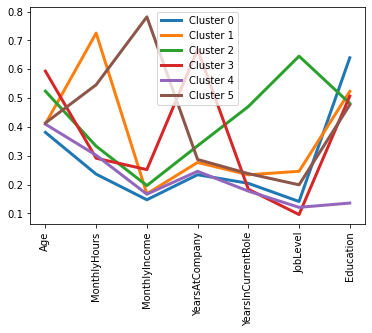

In [16]:
for i in range(0, 6):
    plt.plot(range(0, 7), kmeans.cluster_centers_[i], label='Cluster %s' % i, linewidth=3)
    
plt.xticks(range(0, 7), list(df_copy.columns), rotation = 90)
plt.legend()
plt.show()

In [17]:
df_clusters_4 = df_copy.copy()

In [18]:
df_clusters_4['Labels'] = kmeans.labels_

In [19]:
df_clusters_4

,Age,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,JobLevel,Education,Labels
0,0.809524,0.231122,0.286171,0.40,0.4375,0.50,0.75,2
1,0.428571,0.233476,0.147183,0.05,0.5000,1.00,0.00,2
2,0.166667,0.747017,0.144644,0.05,0.3125,0.25,0.50,1
3,0.357143,0.435214,0.068878,0.15,0.4375,0.00,0.75,0
4,0.309524,0.142192,0.204325,0.50,0.1250,0.00,0.25,4
...,...,...,...,...,...,...,...,...
878,0.476190,0.453907,0.166769,0.50,0.0000,0.00,0.50,3
879,0.452381,0.088947,0.042558,0.85,0.0000,0.00,0.25,3
880,0.357143,0.436931,0.159227,0.55,0.4375,0.25,0.75,0
881,0.357143,0.323273,0.057373,0.15,0.1250,0.25,0.00,4


In [20]:
df_clusters_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 883 entries, 0 to 882
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 883 non-null    float64
 1   MonthlyHours        883 non-null    float64
 2   MonthlyIncome       883 non-null    float64
 3   YearsAtCompany      883 non-null    float64
 4   YearsInCurrentRole  883 non-null    float64
 5   JobLevel            883 non-null    float64
 6   Education           883 non-null    float64
 7   Labels              883 non-null    int32  
dtypes: float64(7), int32(1)
memory usage: 51.9 KB


In [21]:
np.unique(df_clusters_4['Labels'])

array([0, 1, 2, 3, 4, 5], dtype=int32)

In [22]:
np.unique(kmeans.labels_, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([265, 130, 136, 109, 169,  74]))

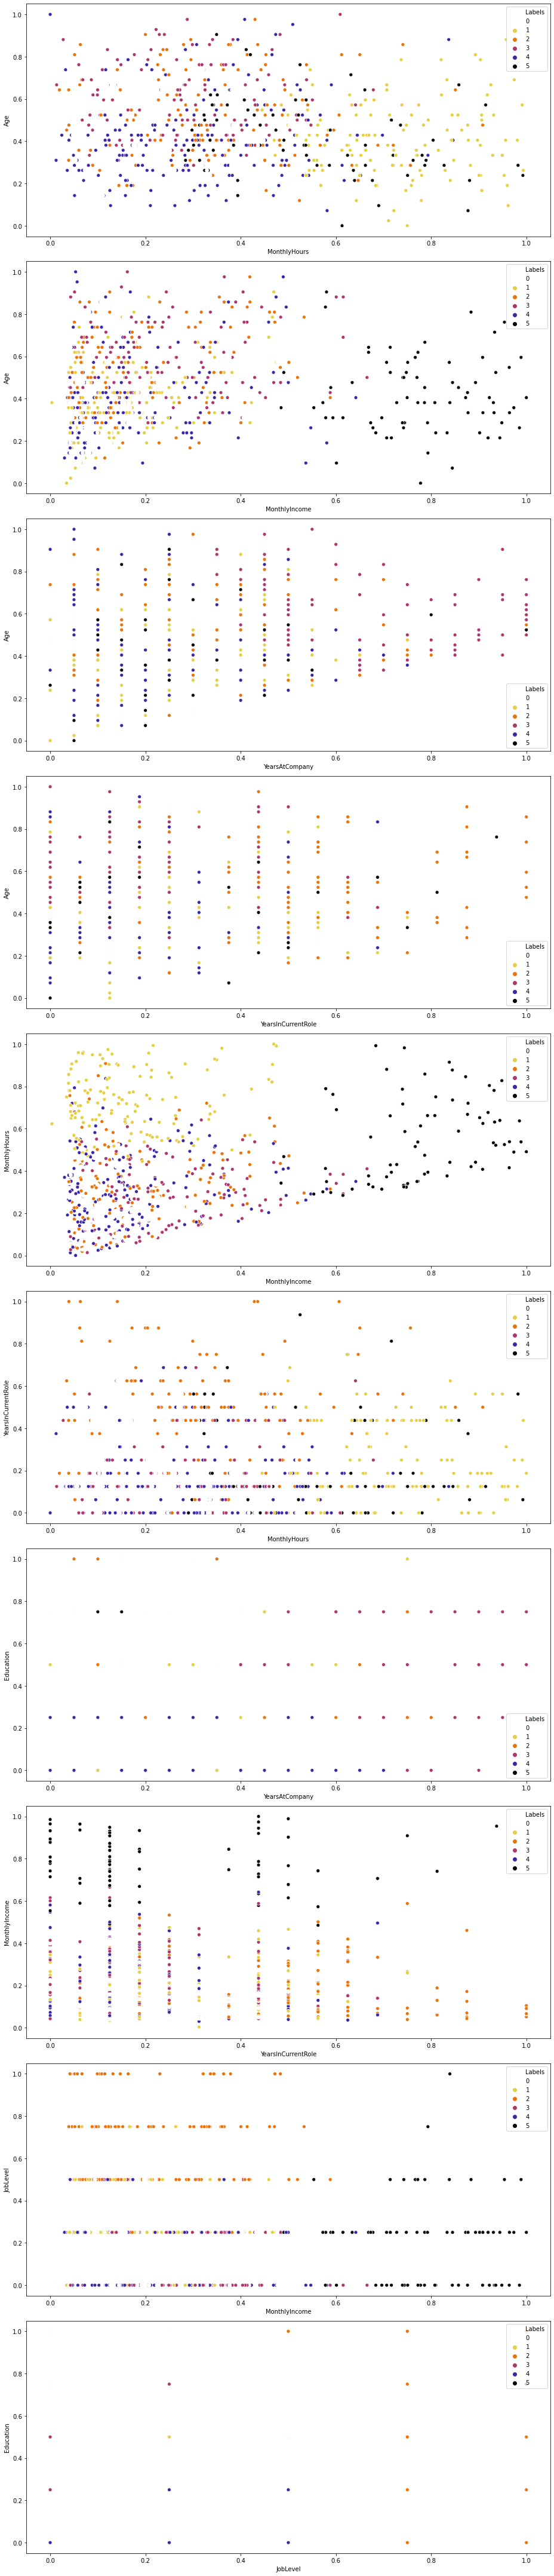

In [23]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(10, 1, figsize = (13,60))

sns.scatterplot(x = 'MonthlyHours', y = 'Age', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax1)

sns.scatterplot(x = 'MonthlyIncome', y = 'Age', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax2)

sns.scatterplot(x = 'YearsAtCompany', y = 'Age', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax3)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'Age', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax4)

sns.scatterplot(x = 'MonthlyIncome', y = 'MonthlyHours', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax5)

sns.scatterplot(x = 'MonthlyHours', y = 'YearsInCurrentRole', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax6)

sns.scatterplot(x = 'YearsAtCompany', y = 'Education', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax7)

sns.scatterplot(x = 'YearsInCurrentRole', y = 'MonthlyIncome', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax8)

sns.scatterplot(x = 'MonthlyIncome', y = 'JobLevel', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax9)

sns.scatterplot(x = 'JobLevel', y = 'Education', data = df_clusters_4, hue = "Labels", legend = "full", palette = "CMRmap_r", ax = ax10)

plt.tight_layout()
plt.show()

<h3>Non normalized dataset for centroid conversion</h3>

In [24]:
scaler = MinMaxScaler()

In [25]:
df_NON_normalized = pd.read_csv("Numerical_NON_NORMALIZED_Train_HR_Employee_Attrition.csv")

In [26]:
df_NON_normalized_reduct = pd.DataFrame()

col_to_add = ['Age','MonthlyHours', 'MonthlyIncome', 'YearsAtCompany', 'YearsInCurrentRole', 'JobLevel', 'Education']

for element in col_to_add:
    df_NON_normalized_reduct[element] = df_NON_normalized[element]
    
df_NON_normalized_reduct

,Age,MonthlyHours,MonthlyIncome,YearsAtCompany,YearsInCurrentRole,JobLevel,Education
0,52,156.61,8446,8,7,3,4
1,36,157.94,4834,1,8,5,1
2,25,448.06,4768,1,5,2,3
3,33,271.91,2799,3,7,1,4
4,31,106.37,6319,10,2,1,2
...,...,...,...,...,...,...,...
878,38,282.47,5343,10,0,1,3
879,37,76.29,2115,17,0,1,2
880,33,272.88,5147,11,7,2,4
881,33,208.67,2500,3,2,2,1


In [27]:
X = scaler.fit_transform(df_NON_normalized_reduct.values)

In [28]:
centers = scaler.inverse_transform(kmeans.cluster_centers_)

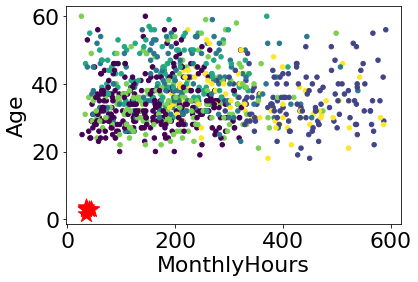

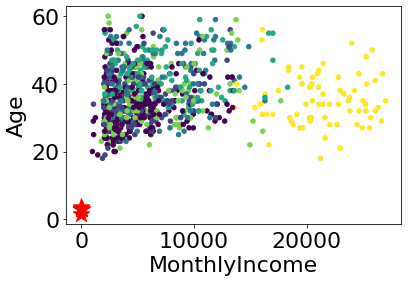

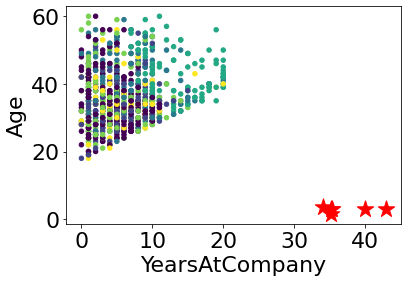

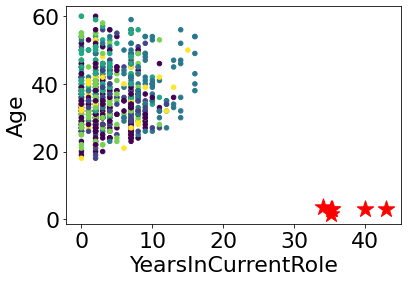

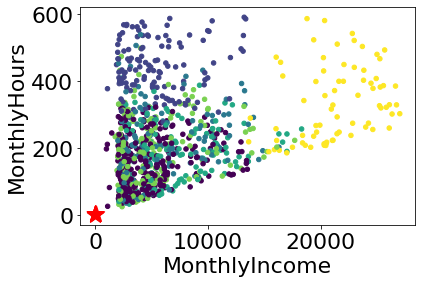

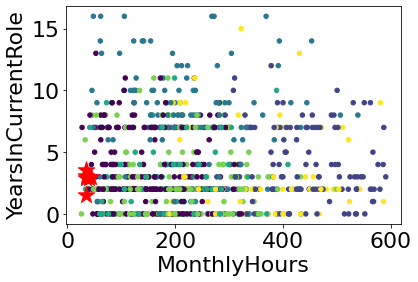

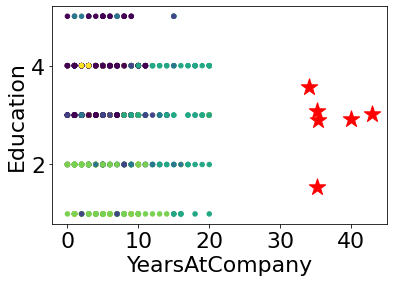

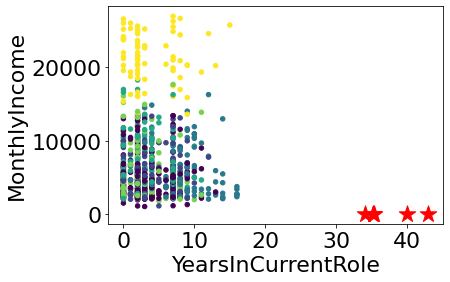

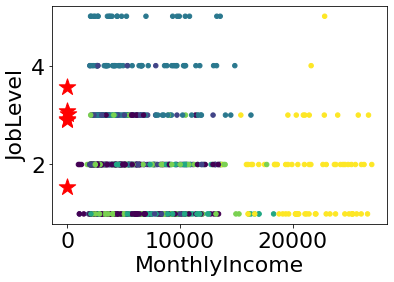

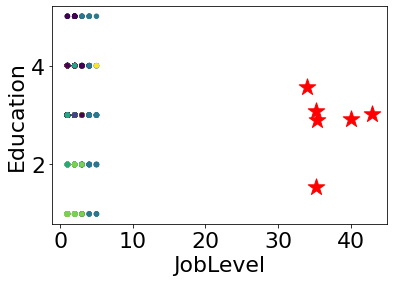

In [29]:
features_to_plot = [('MonthlyHours', 'Age'), ('MonthlyIncome', 'Age'),('YearsAtCompany', 'Age'), 
                    ('YearsInCurrentRole', 'Age'), ('MonthlyIncome', 'MonthlyHours'), 
                    ('MonthlyHours', 'YearsInCurrentRole'), ('YearsAtCompany', 'Education'),
                    ('YearsInCurrentRole', 'MonthlyIncome'), ('MonthlyIncome', 'JobLevel'), ('JobLevel', 'Education')]

for a, b in features_to_plot:
    plt.scatter(df_NON_normalized_reduct[a], df_NON_normalized_reduct[b], c=kmeans.labels_, s=20)
    plt.scatter(centers[:, 0], centers[:, 6], s=300, marker='*', c='r')
    plt.tick_params(axis='both', which='major', labelsize=22)
    plt.xlabel(a, fontsize=22)
    plt.ylabel(b, fontsize=22)
    plt.show()

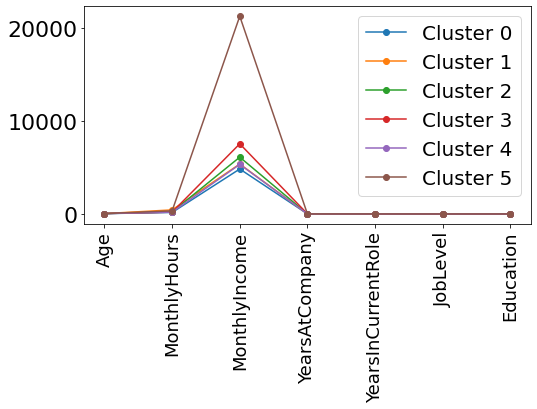

In [30]:
plt.figure(figsize=(8, 4))
for i in range(0, len(centers)):
    plt.plot(centers[i], marker='o', label='Cluster %s' % i)
    
plt.tick_params(axis='both', which='major', labelsize=22)
plt.xticks(range(0, len(df_copy.columns)), df_copy.columns, fontsize=18, rotation = 90)
plt.legend(fontsize=20)
plt.show()

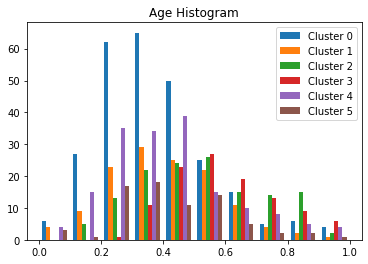

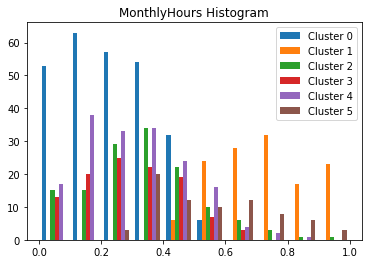

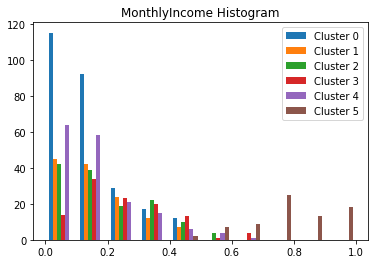

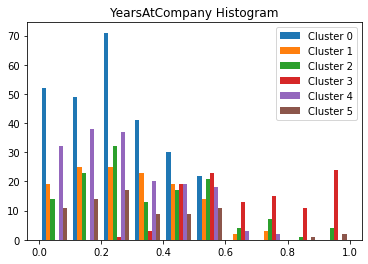

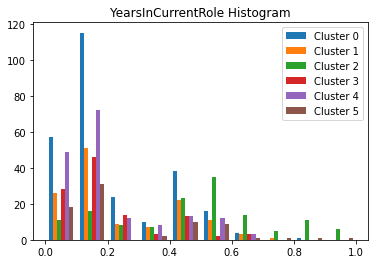

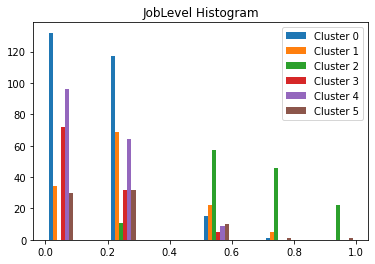

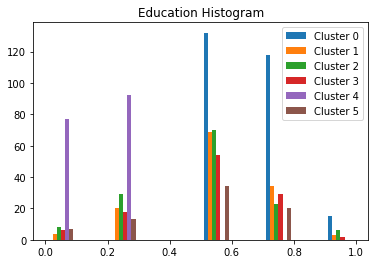

In [32]:
for column in df_copy.columns:
    
    cluster_list = []
    list_num_cluster = []
    
    for num_cluster in np.unique(df_clusters_4['Labels']):
        cluster_list.append(df_clusters_4[df_clusters_4['Labels'] == num_cluster][column])  #distribution
        list_num_cluster.append('Cluster %s' % num_cluster)                                 #num cluster
           
    plt.hist(cluster_list, label = list_num_cluster)
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

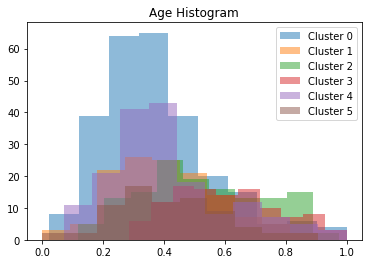

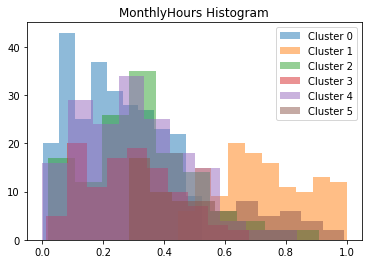

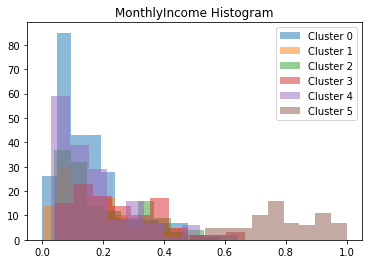

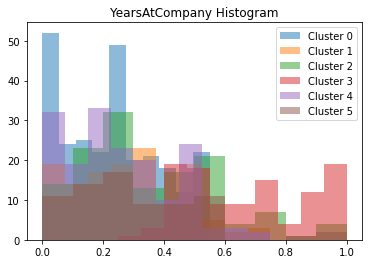

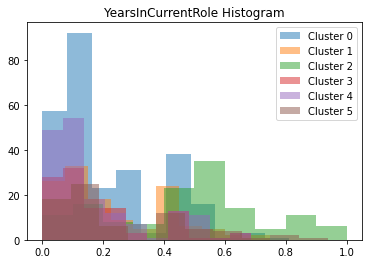

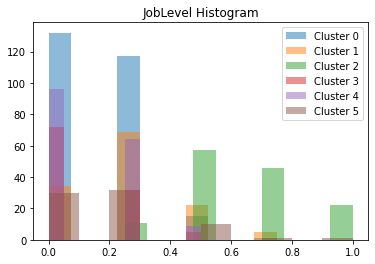

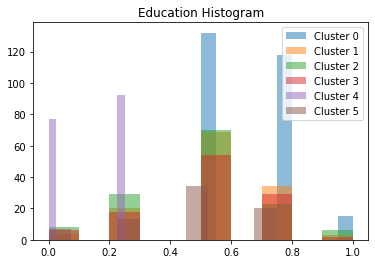

In [33]:
for column in df_copy.columns:
    
    for num_cluster in np.unique(df_clusters_4['Labels']):
        plt.hist(df_clusters_4[df_clusters_4['Labels'] == num_cluster][column], 
                 alpha = 0.5, label = 'Cluster %s' % num_cluster)       
    
    plt.legend(loc='upper right')
    plt.title(column + " Histogram")               
    plt.show()

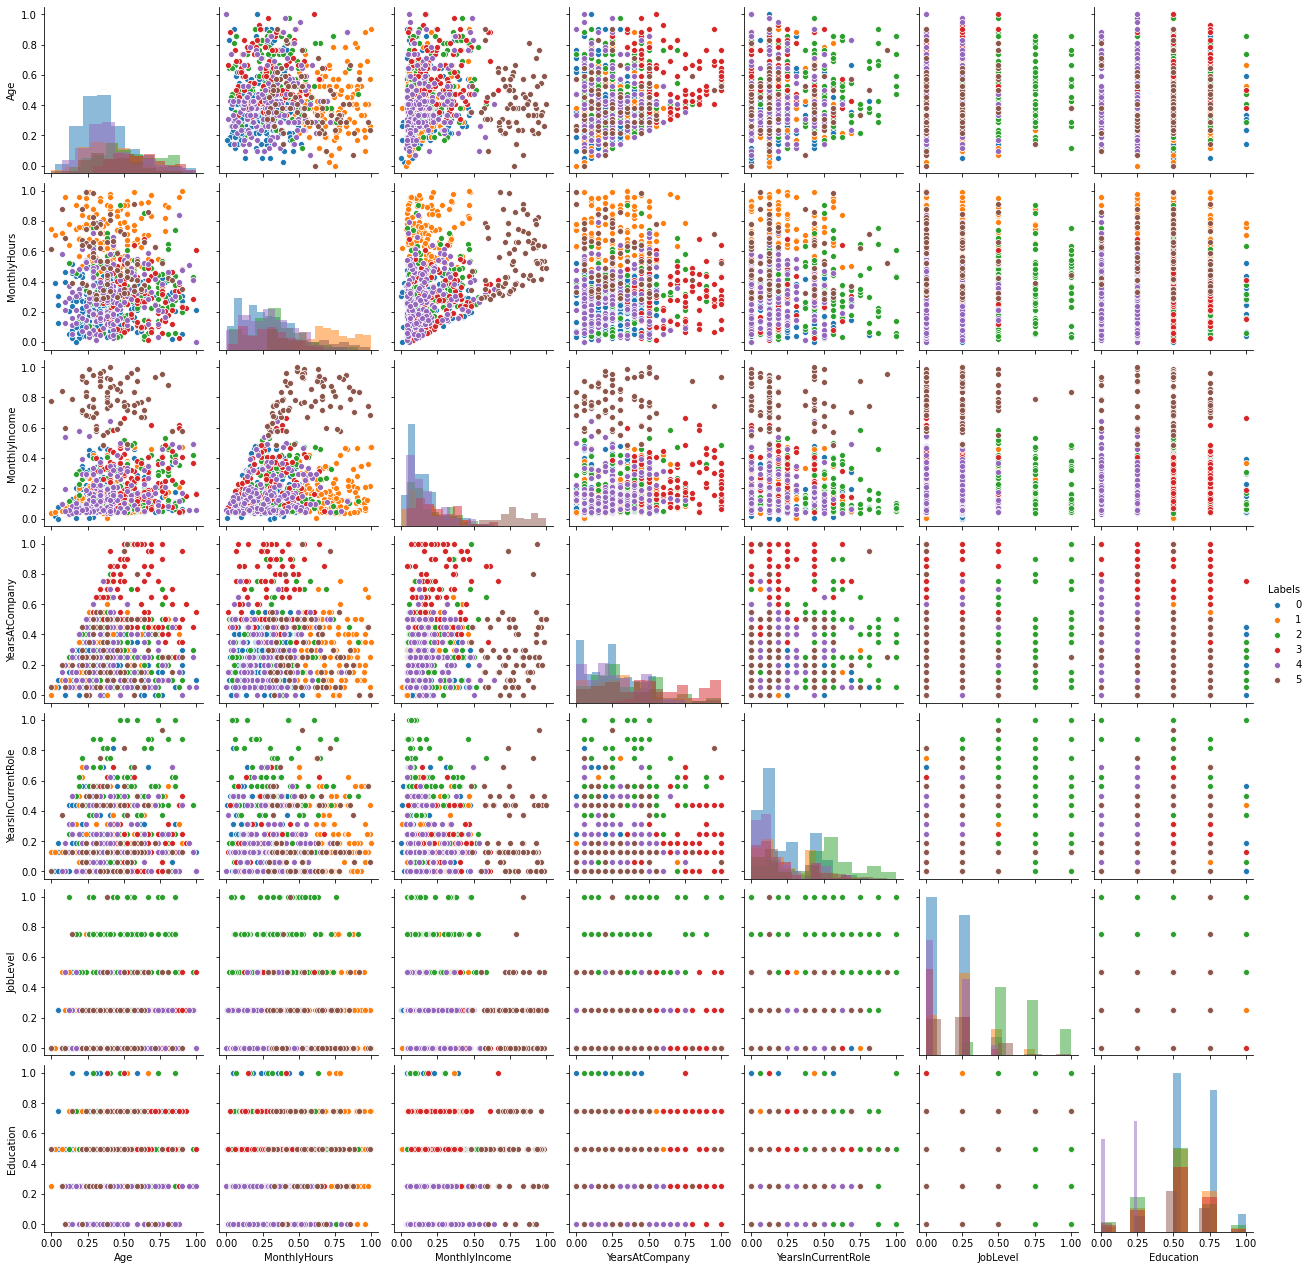

In [34]:
sns.pairplot(df_clusters_4, hue="Labels", diag_kws={'alpha':0.5}, diag_kind="hist")